<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Module-2-Week-2-IP/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Hass Consulting Company Housing Price Prediction**

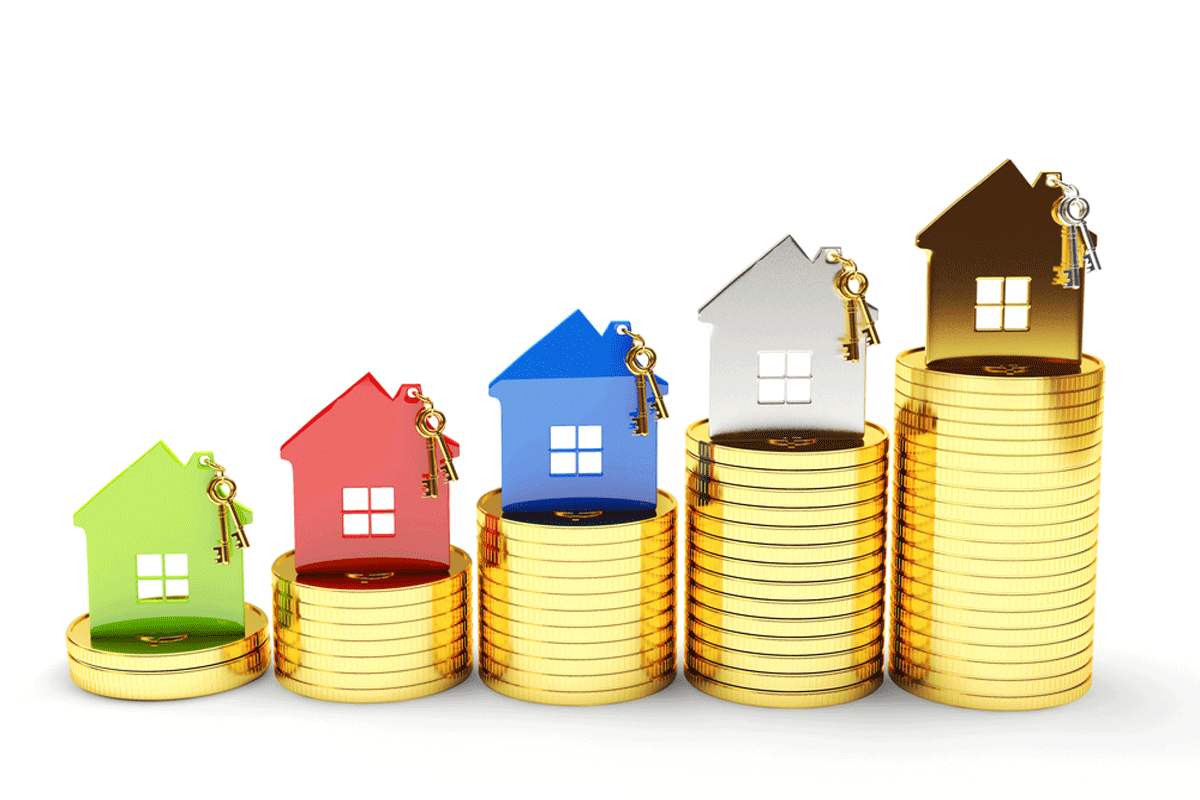

## 1. Defining the Question

### a) Specifying the Question

Hass Consulting Company, a real estate leader with over 25 years of experience, wishes to uncover the factors that affect housing prices. Information that was collected over the past few years is to be analyzed to uncover these factors, as well as to create an accurate prediction model. 




### b) Defining the Metric for Success

1. Accurately predicting the house price for the last year in the datatset with an r2 score of at least 0.8 and a low RMSE value.
2. Accurately determining the factors that affect house prices generally, and for low, median and high house prices.

### c) Understanding the context 

Hass Conculting company, being a real estate leader, requires accurate prediction of house prices. Furthermore, the predictions need to be accurate for different house price brackets (low, median and high). Therefore, to mainatin its competeitive streak, this condition must be adhered to, as purchase of houses is an expensive venture that requires proper planning by the client. This will also help to mainatin the company's reputation.

### d) Recording the Experimental Design

The following list depicts the steps to be undertaken during the project.

1. Data sourcing/loading.
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preperation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Modeling:
* Multiple Linear Regression
* Quantile Regression
* Ridge Regression
* Lasso Regression
* Elastic Net Regression

10. Implementing the solution
11. Challenging the solution
12. Conclusion
13. Follow up questions.


### e) Data Relevance

1. The data should have variables that adequately contribute to predicting the match results.
2. The dataset should lead to a high model fit (high accuracy and low error), after all possible model optimization procedures have been applied.

## 2. Data Understanding

In [235]:
# Imports
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from scipy.stats import bartlett, chi2, loguniform
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os
# Using seaborn style defaults and setting the default figure size
sns.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [236]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Core/Machine Learning/Moring Core Module 2 Week 2 IP')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### a) Reading the Data

In [237]:
# Dataset loading
house_price = pd.read_csv('Independent Project Week 7 - house_data.csv')

### b) Checking the Data

**Number of Records**

In [238]:
# Number of rows and columns
print(f'Records: {house_price.shape[0]} and columns: {house_price.shape[1]}')

Records: 21613 and columns: 20


**Top Dataset Preview**

In [239]:
# First 5 records
house_price.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Bottom Dataset Preview**

In [240]:
# Last 5 records
house_price.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


### c) Checking Datatypes

In [241]:
# Dataset infromation
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

The datatypes do not need to be changed. Futhermore, the dataset does not have missing values.

## 3. External Dataset Validation 

* The dataset is similar to datasets for the previous house prices (upto 2015) in King County, Washington State, USA. These datasets can be found in [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction), [IBM](https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/79abd27f-1965-4ff8-be95-1373058adc3c/view?access_token=d2e9cdeae1f353377bd2ed6e049adc10faa6820a3eb9abfe509963815ff831dc) and [Geoda Data and Lab](https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/).

## 4. Data Preperation

### a) Validation

In [242]:
# Dataset columns
house_price.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [243]:
# Dropping the ID column as it does not contribute significant information to the project.
house_price.drop('id', axis = 1, inplace = True)

### b) Completeness

In [244]:
# Confirming that there are no missing values.
house_price.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

### c) Consistency

In [245]:
# Checking for duplicates
house_price.duplicated().any().any()

True

In [246]:
# Dropping duplicates
house_price.drop_duplicates(inplace = True)
# Checking changes
house_price.duplicated().any().any()

False

Duplicates have been removed.

### d) Uniformity

In [247]:
# Checking column name uniformity
house_price.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

The column names are uniform.

### e) Outliers

In [1]:
# Outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [249]:
# Checking for outliers
outliers(house_price)

Number of outliers = 6680
Percentage = 30.91447611995557%


Outliers will be retained for further analysis as they form a significant part of the data.

To compare model performance with and without outliers, a dataset without outliers will be created.

In [250]:
# Dataset without outliers
# Removing outliers 
Q1 = house_price.quantile(0.25)
Q3 = house_price.quantile(0.75)
IQR = Q3 - Q1
house_price_no =  house_price[~ ((house_price< (Q1 - 1.5 * IQR)) |(house_price > (Q3 + 1.5 * IQR))).any(axis=1)]
house_price_no.shape

(14928, 19)

**Adding city column**

From the external dataset validation, a brief search of the zip codes, lattitudes and longitudes, revealed that they belong to King County, Washington State, USA. Therefore, the zipcodes will be grouped by city based on information from [city zip codes](https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033).

In [251]:
# Cities and their zip codes.
Algona =[98001, 98047]
Auburn = [98002, 98030, 98071, 98092]
Bellevue = [98005, 98006, 98007, 98008, 98009, 98015]
Black_Diamond =[9810]
Bothell = [98011, 98021, 98034, 98041]
Burien = [98062, 98108, 98146, 98148, 98166, 98168]
Carnation = [98014]
Clyde_Hill = [98004]
Covington = [98042]
Des_Moines =[98148, 98198]
Duvall = [98019]
Enumclaw = [98022]
Federal_Way = [98003, 98023, 98063, 98093]
Issaquah =[98027, 98029, 98075]
Kenmore =[98028]
Kent = [98030, 98031, 98032, 98035, 98042, 98064]
Kirkland = [98033, 98034, 98083]
Lake_Forest_Park = [98155]
Maple_Valley = [98038]
Medina = [98039]
Mercer_Island = [98040]
Milton = [98354]
Newcastle = [98056, 98059]
Normandy_Park = [98148, 98166, 98198]
North_Bend = [98045]
Pacific =[98047]
Redmond = [98052, 98053, 98054, 98073, 98074]
Renton = [98055, 98057, 98058, 98059]
Sammamish = [98075]
SeaTac = [98158]
Seattle = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98109, 
           98111,  98112,  98114,  98115,  98116,  98117,  98118,
           98119,  98121, 98122, 98124, 98125, 98126, 98131, 98132,
           98134, 98136, 98144, 98145, 98154, 98160, 98161, 98164,
           98171, 98174, 98199]
Shoreline = [98133, 98155, 98177]
Snoqualmie = [98065, 98068]
Tukwila = [98108, 98138, 98168, 98178, 98188]
Woodinville = [98072]

In [252]:
# Variable that contains the list of cities with the required zip codes.
var = [Algona, Auburn, Bellevue, Black_Diamond, Bothell, Burien, Carnation, Clyde_Hill, Covington, Des_Moines, Duvall, Enumclaw, Federal_Way, Issaquah, Kenmore, Kent, Kirkland, Lake_Forest_Park, Maple_Valley, Medina, Mercer_Island, Milton, Newcastle, Normandy_Park, North_Bend, Pacific, Redmond, Renton, Sammamish, SeaTac, Seattle, Shoreline, Snoqualmie, Tukwila, Woodinville]

In [253]:
# List of strings containing the city names to be filled in the datasets.
cities = 'Algona, Auburn, Bellevue, Black Diamond, Bothell, Burien, Carnation, Clyde Hill, Covington, Des Moines, Duvall, Enumclaw, Federal Way, Issaquah, Kenmore, Kent, Kirkland, Lake Forest Park, Maple Valley, Medina, Mercer Island, Milton, Newcastle, Normandy Park, North Bend, Pacific, Redmond, Renton, Sammamish, SeaTac, Seattle, Shoreline, Snoqualmie, Tukwila, Woodinville'
cities = cities.split(',')

In [254]:
# Adding a city columns
house_price['city'] = ''
house_price_no['city'] = ''

In [255]:
# Function that assigns a city depending on the zip code.
def Cities(cities, source, target, list, data):
  for i, city in enumerate(cities):
    data.loc[(data[source].apply(lambda x: x in city)), [target]]= list[i]

In [256]:
# Function call
# With outliers
Cities(var, 'zipcode', 'city', cities, house_price)
# Without outliers
Cities(var, 'zipcode', 'city', cities, house_price_no)

## 5. Exploratory Data Analyisis

### a) Univariate Analysis

**Categorical**

In [257]:
# Columns
cols = house_price.columns.tolist()
# Number of unique values
print(f'Number of unique values\n')
for col in cols:
  print(f'{col}: {len(house_price[col].unique().tolist())}')


Number of unique values

price: 3625
bedrooms: 13
bathrooms: 30
sqft_living: 1038
sqft_lot: 9782
floors: 6
waterfront: 2
view: 5
condition: 5
grade: 12
sqft_above: 946
sqft_basement: 306
yr_built: 116
yr_renovated: 70
zipcode: 70
lat: 5034
long: 752
sqft_living15: 777
sqft_lot15: 8689
city: 29


Categorical columns = waterfront, condition, grade and city.

In [258]:
# Categorical Plots
def CatPlots(column, rot, data):
  fig,ax  = plt.subplots(figsize = (20,5))
  sns.countplot(data[column], palette = 'viridis', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xticks(rotation = rot)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

*Waterfront*

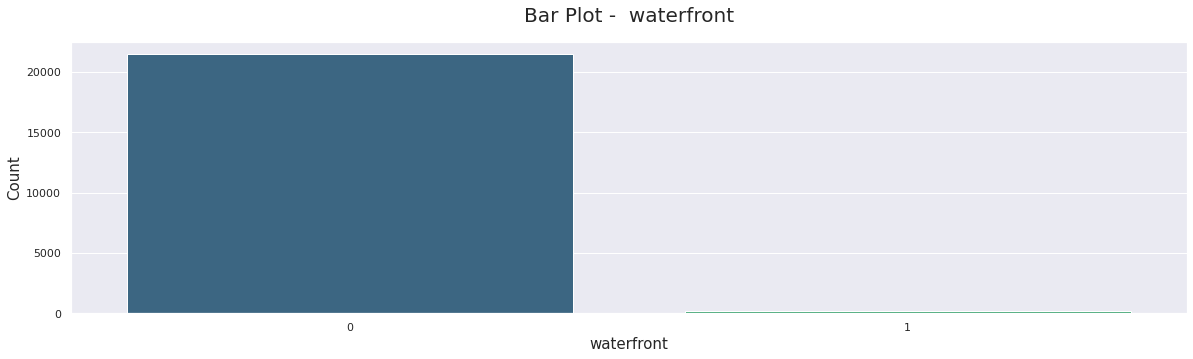

In [259]:
# Waterfront count plot
CatPlots('waterfront', 0, house_price)

Mjority of houses do not have a waterfront.

*Condition*

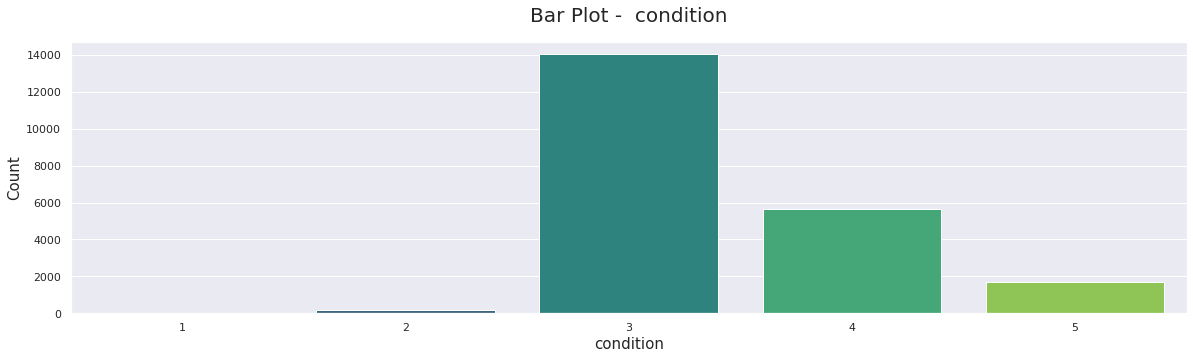

In [260]:
# Condition countplot
CatPlots('condition', 0, house_price)

Most houses are in average condition.

*Grade*

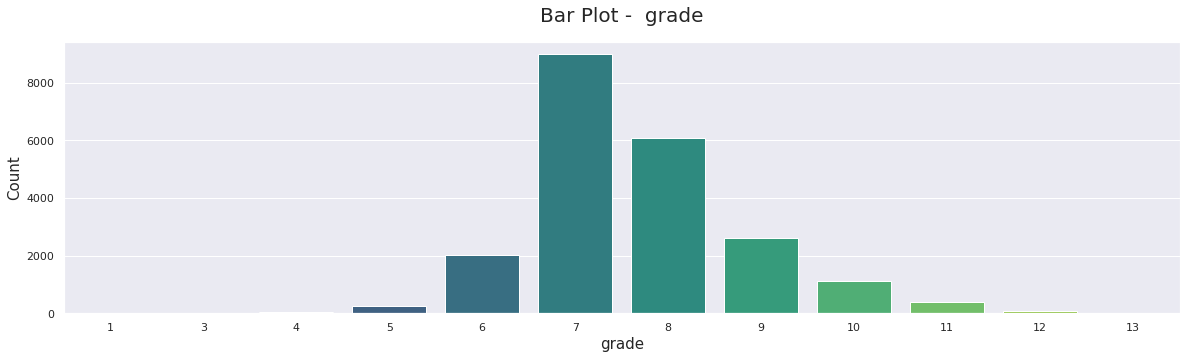

In [261]:
# Grade count plot
CatPlots('grade', 0, house_price)

Most houses have an average grade.

*City*

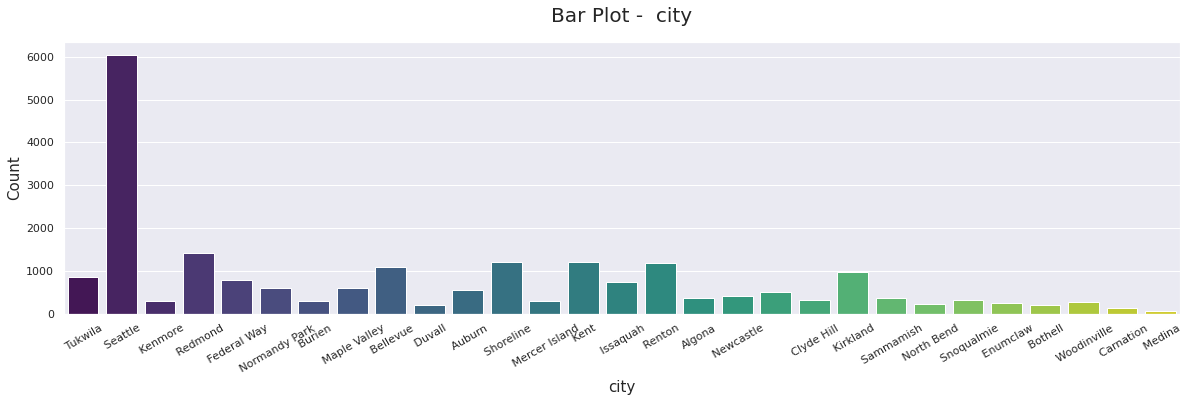

In [262]:
# Grade count plot
CatPlots('city', 30, house_price)

Seattle had the highest number of houses for sale.

**Numerical Data Analysis**

*Function definition*

In [263]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [264]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")


In [265]:
# Distribution and Boxplot plot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12, 10))
  # Outliers
  # Distribution plot
  sns.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sns.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

In [266]:
# Columns
columns = house_price.columns.tolist()
# Categorical columns
categorical = ['waterfront', 'condition', 'grade', 'city']
# Continuous columns
continuous = list(set(columns) - set(categorical))

*Measures of Distribution*

In [267]:
# Range
MeasureDistribution('range', continuous, house_price)

yr_renovated column range = 2015
view column range = 4
sqft_lot15 column range = 870549
sqft_living column range = 13250
price column range = 7625000.0
sqft_living15 column range = 5811
bedrooms column range = 33
sqft_basement column range = 4820
zipcode column range = 198
sqft_above column range = 9120
lat column range = 0.621699999999997
floors column range = 2.5
bathrooms column range = 8.0
yr_built column range = 115
sqft_lot column range = 1650839
long column range = 1.2040000000000077


Columns such as the price column have wide ranges. This could represent the large variation in low, median and high priced houses.

In [268]:
# Skewness
MeasureDistribution('skew', continuous, house_price)

yr_renovated column skew = 4.551733778950017
view column skew = 3.396676532553183
sqft_lot15 column skew = 9.505817992358532
sqft_living column skew = 1.4714674846314069
price column skew = 4.021354631513139
sqft_living15 column skew = 1.1082576840301879
bedrooms column skew = 1.9743628437076959
sqft_basement column skew = 1.577730731994438
zipcode column skew = 0.4056844629809451
sqft_above column skew = 1.4467403506883187
lat column skew = -0.48518259836955446
floors column skew = 0.616339735126005
bathrooms column skew = 0.5111461154271603
yr_built column skew = -0.4697823592834102
sqft_lot column skew = 13.058690623882546
long column skew = 0.8852768444876


Some columns have a positve skew, only two have a slightly negative skew. The rest of the columns have a close-to-normal distribution.

In [269]:
# Kurtosis
MeasureDistribution('kurt', continuous, house_price)

yr_renovated column kurt = 18.72154593111135
view column kurt = 10.900687076848012
sqft_lot15 column kurt = 150.732711029956
sqft_living column kurt = 5.242209340747705
price column kurt = 34.51538421151693
sqft_living15 column kurt = 1.5969742424841624
bedrooms column kurt = 49.06562128233084
sqft_basement column kurt = 2.714432815066743
zipcode column kurt = -0.8535698817907043
sqft_above column kurt = 3.4019276693258385
lat column kurt = -0.6767834455237307
floors column kurt = -0.4848736638828255
bathrooms column kurt = 1.2792645615484326
yr_built column kurt = -0.6571807366498081
sqft_lot column kurt = 285.01867792617475
long column kurt = 1.049927493411873


There is a mixture of Platykurtic, Leptokurtic and Mesokurtic column distributions.

**Distribution and Box Plots**

Plots of the dataset with and without outliers will be ploted as the plots for the latter provides a more granulated view of the distribution of values.

*Price*

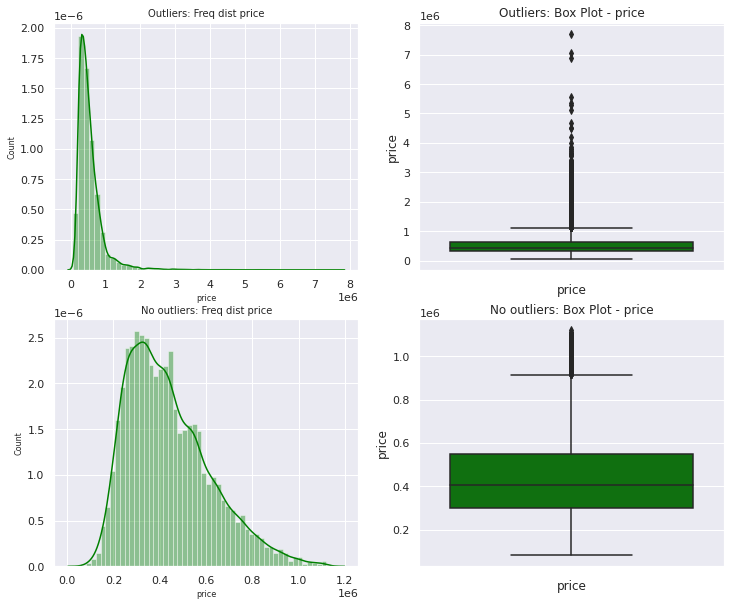

In [270]:
# Price column
NumericalPlots(columns[0], house_price, house_price_no)

Most houses had a price of $300,000.

*Number of bedrooms*

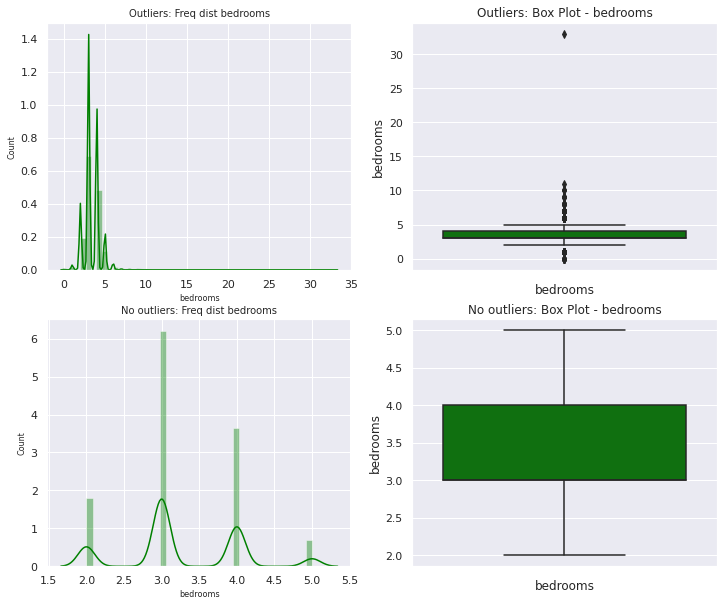

In [271]:
# Number of bedrooms column
NumericalPlots(columns[1], house_price, house_price_no)

Most houses had 3 bedrooms.

*Number of bathrooms*

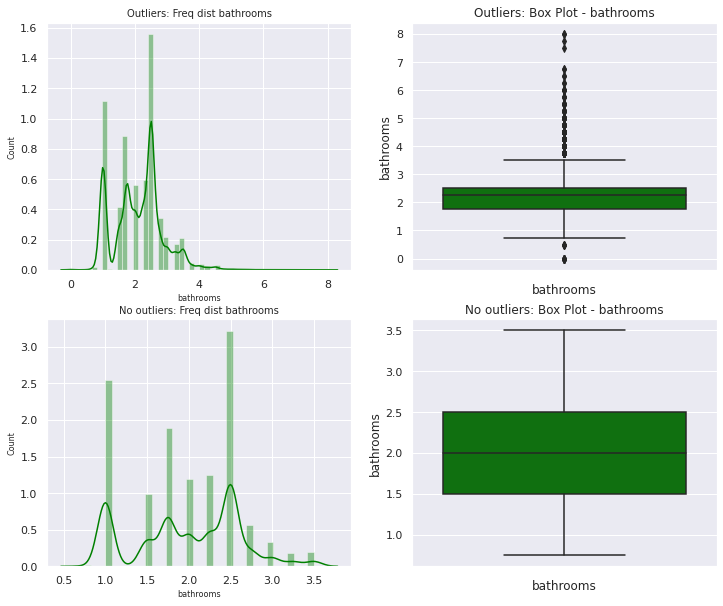

In [272]:
# Number of bathrooms column
NumericalPlots(columns[2], house_price, house_price_no)

Most houses had 2 and a half bathrooms. This could mean two bathrooms (with washrooms/ restrooms) and a single restroom, without a bathroom.

*Square feet of living area*

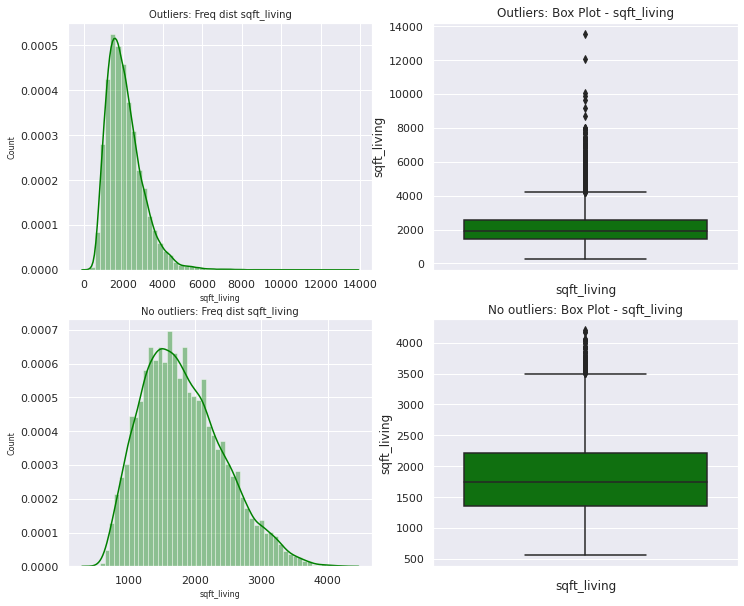

In [273]:
# Square feet area of living area column
NumericalPlots(columns[3], house_price, house_price_no)

Most houses have an area of around 1,600 square feet.

*Square feet of living area (15)*

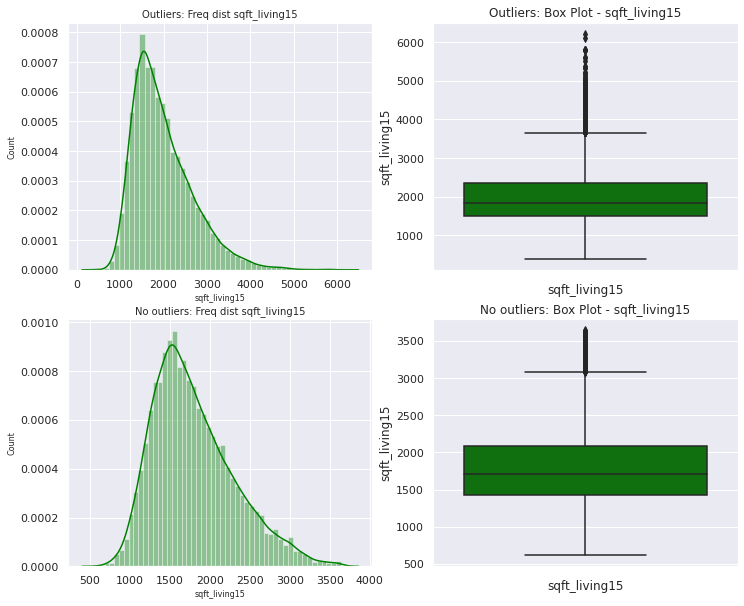

In [274]:
# Square feet of living area (15)
NumericalPlots(columns[17], house_price, house_price_no)

For this column, the area is also 1,600 square feet for most houses.

*Square feet area of parking layout*

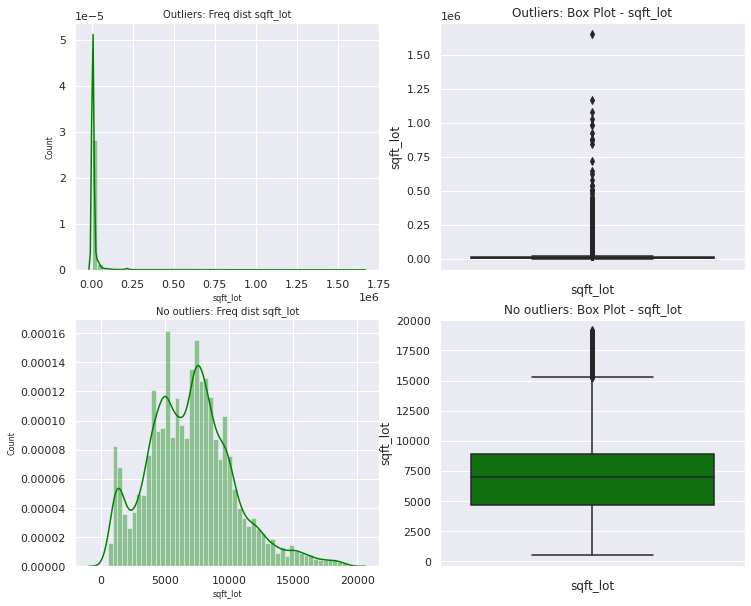

In [275]:
# Square feet area of parking layout
NumericalPlots(columns[4], house_price, house_price_no)

Most houses have a square feet area of parking layout of 5,000.

*Square feet area of parking layout (15)*

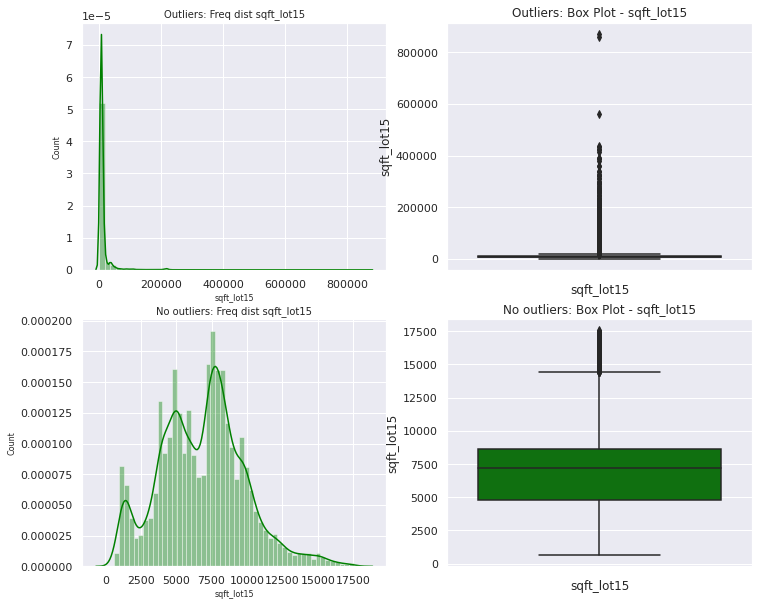

In [276]:
# Square feet area of parking layout
NumericalPlots(columns[18], house_price, house_price_no)

Most houses have a square feet area of parking layout (15) of 7,500.

*Number of floors*

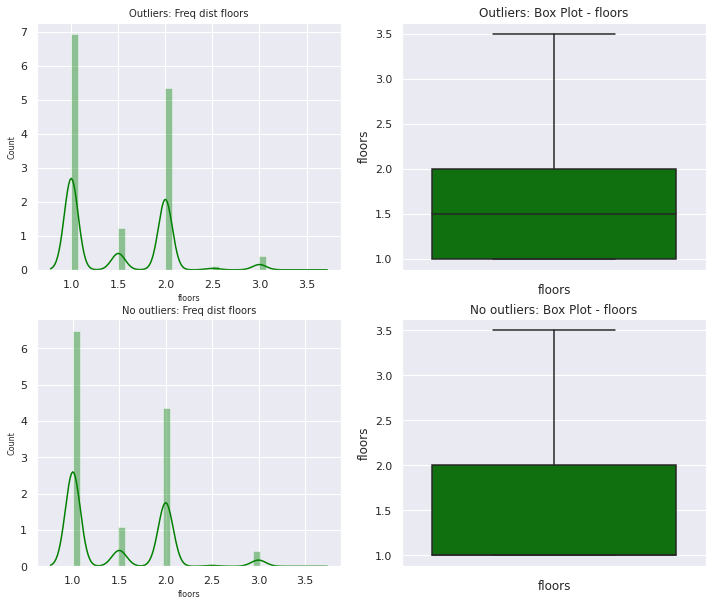

In [277]:
# Number of floors
NumericalPlots(columns[5], house_price, house_price_no)

Most houses have one floor.

*Number of Views*

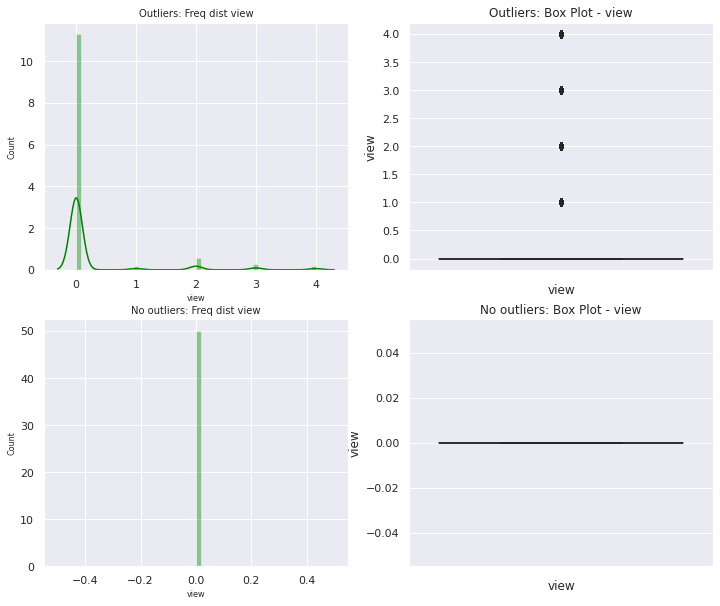

In [278]:
# Number of views
NumericalPlots(columns[7], house_price, house_price_no)

Most houses in the dataset lack views.

*Square feet above*

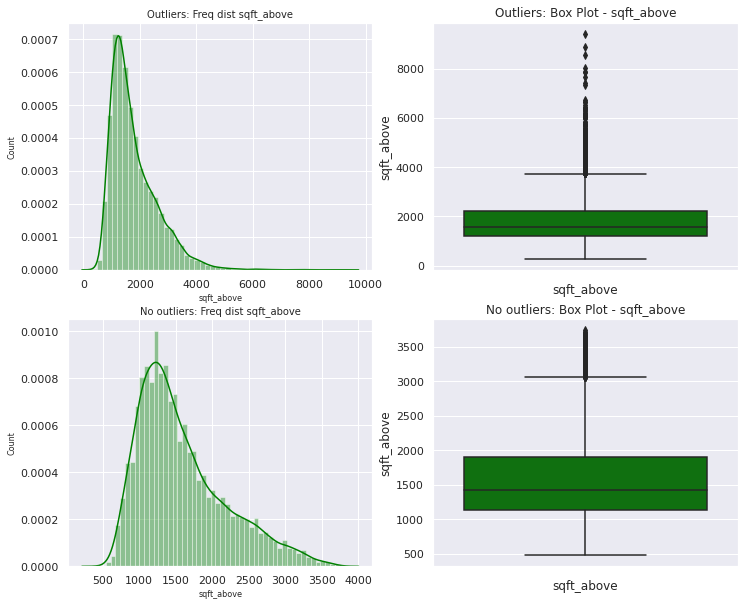

In [279]:
# Square feet above column
NumericalPlots(columns[10], house_price, house_price_no)

Most house have an area of 1,250 in square feet.

*Basement (Square feet)*

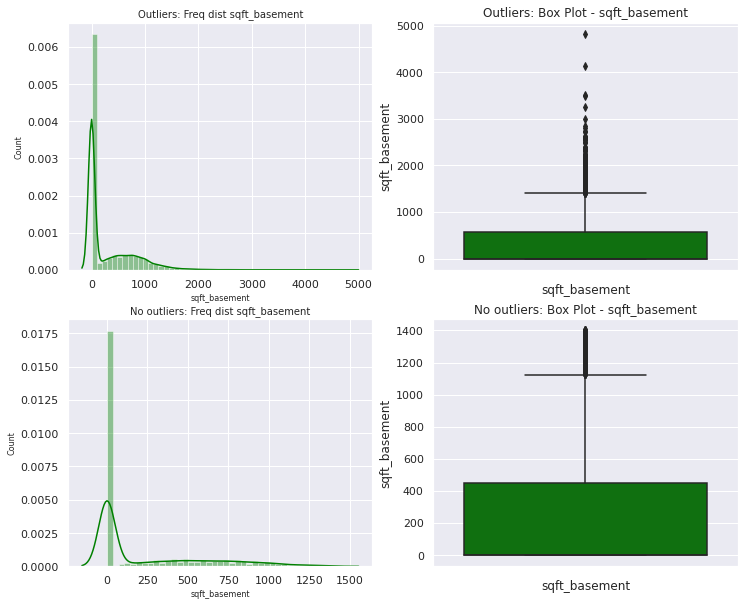

In [280]:
# Basement
NumericalPlots(columns[11], house_price, house_price_no)

Most houses do not have a basement.

*Year Built*

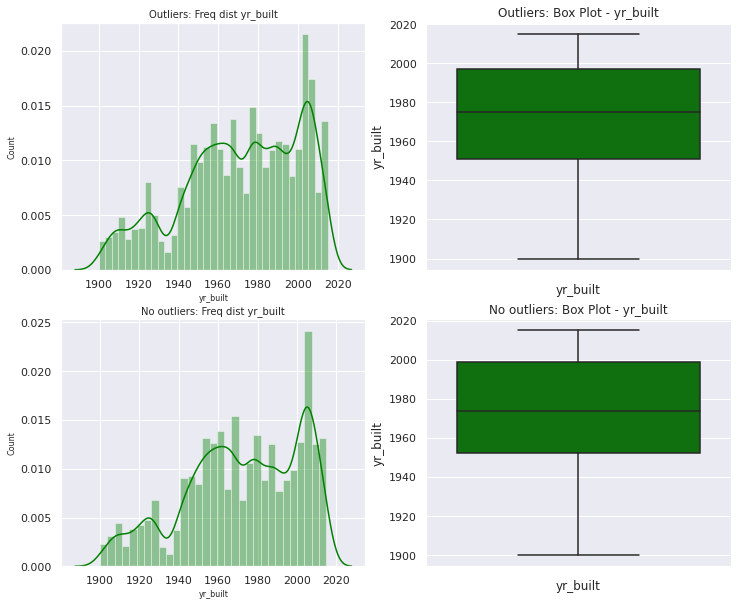

In [281]:
# Year built
NumericalPlots(columns[12], house_price, house_price_no)

Most houses were built between 2004 and 2008.

*Year of Rennovation*

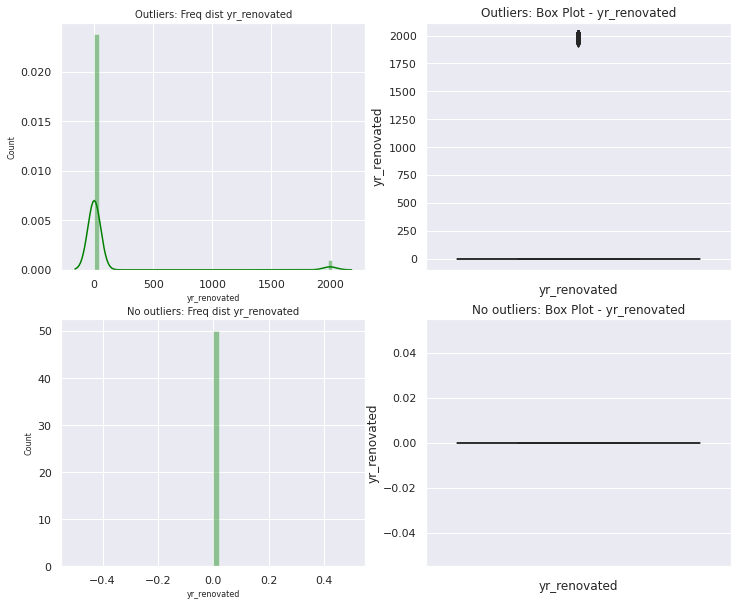

In [282]:
# Year of rennovation
NumericalPlots(columns[13], house_price, house_price_no)

Most houses were not renovated. For those that were, it was mostly done in the 2000's.

*Zip Code*

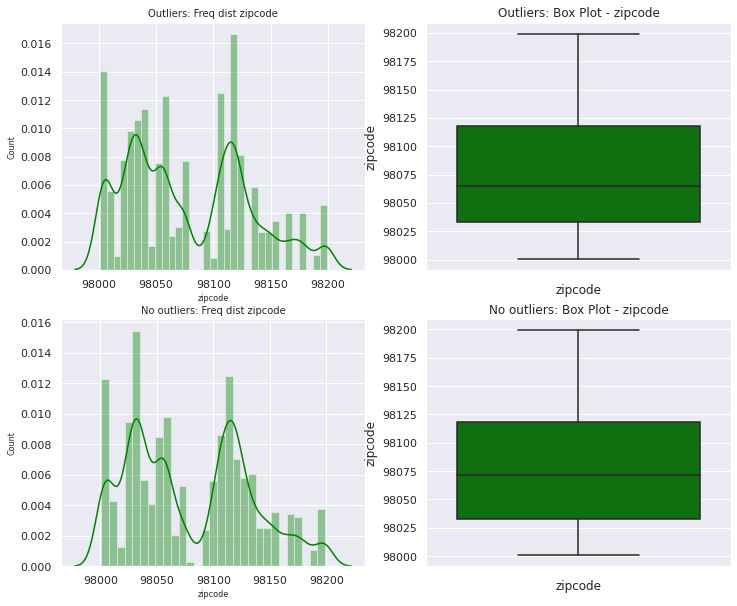

In [283]:
# Zip Code
NumericalPlots(columns[14], house_price, house_price_no)

Most houses were located in the zip codes around 98025, 9800 and 98125.

*Lattitude*

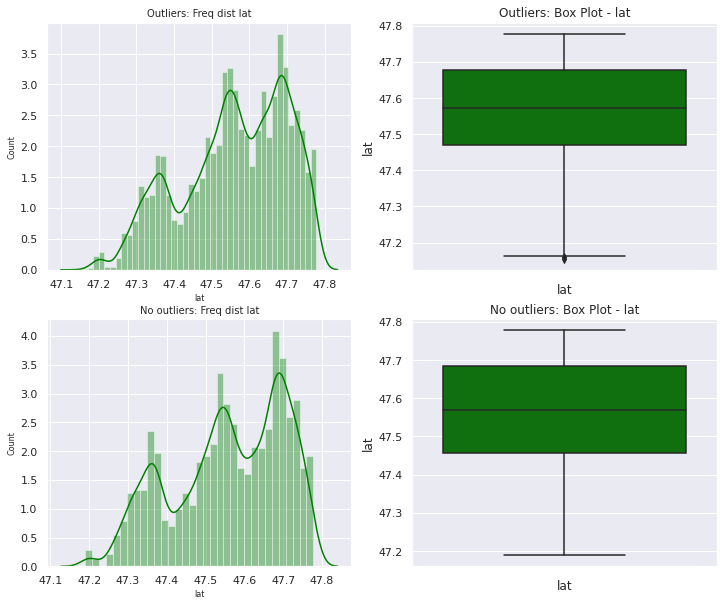

In [284]:
# Lattitude
NumericalPlots(columns[15], house_price, house_price_no)

Most houses were at a lattitude of around 47.7.

*Longitude*

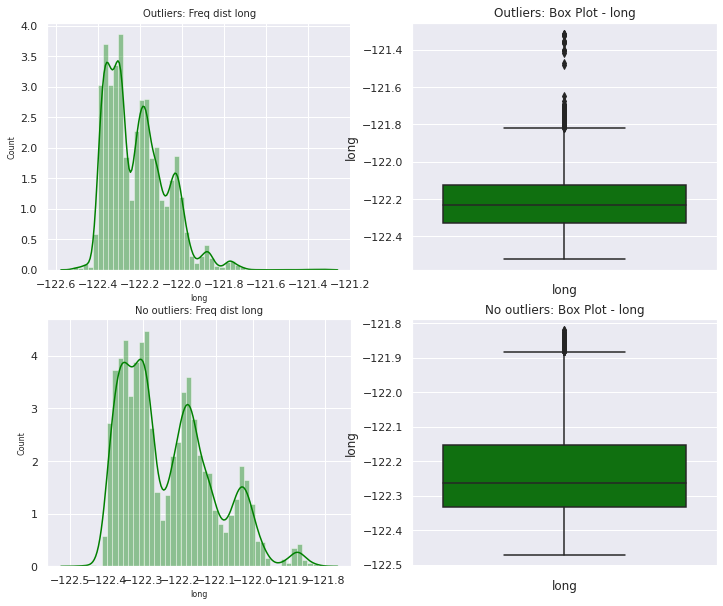

In [285]:
# Longitude
NumericalPlots(columns[16], house_price, house_price_no)

Most longitudes range from -122.4 to -122.3

### b) Bivariate Analysis

#### Categorical - Categorical

In [286]:
# Function used to generate a crosstab before plotting a stacked bar chart.
def CrosstabPlot(x, y, rot, data):  
  table = pd.crosstab(data[x], data[y])
  table.plot.bar(stacked = True, figsize = (30,5))
  plt.title(f'{x} Vs {y}', y = 1.05, fontsize = 12)
  plt.xticks(rotation = rot)
  plt.xlabel(x, fontsize = 10)
  plt.ylabel(y, fontsize = 10)

In [287]:
# Categorical columns
categorical

['waterfront', 'condition', 'grade', 'city']

*Condition Vs Waterfront*

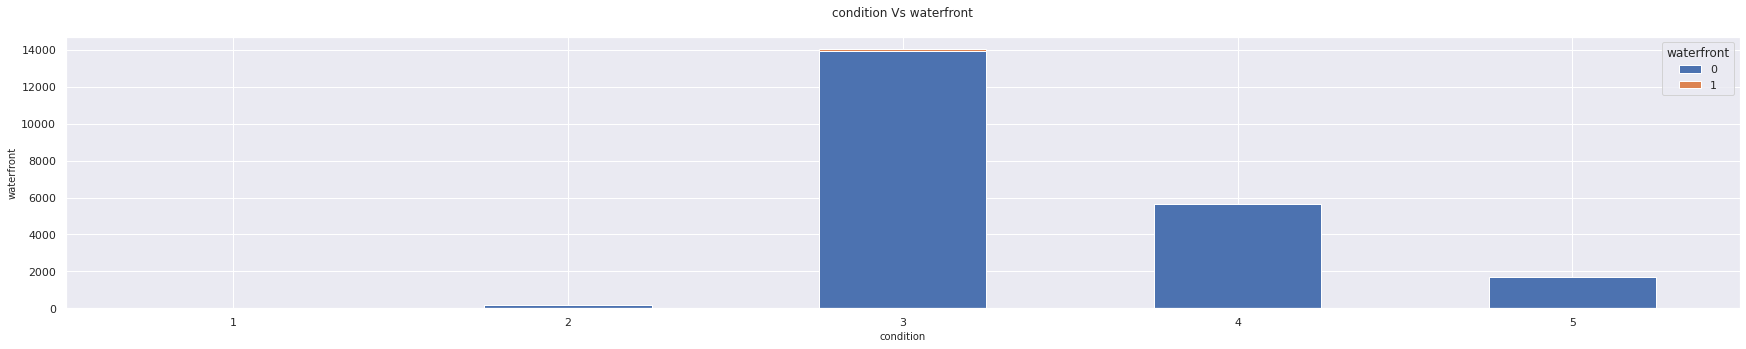

In [288]:
# Count plot
CrosstabPlot('condition', 'waterfront', 0, house_price)

Most houses lack a waterfront, however, it seems like very few houses with a condition of 3 have them.

*Condition Vs Grade* 

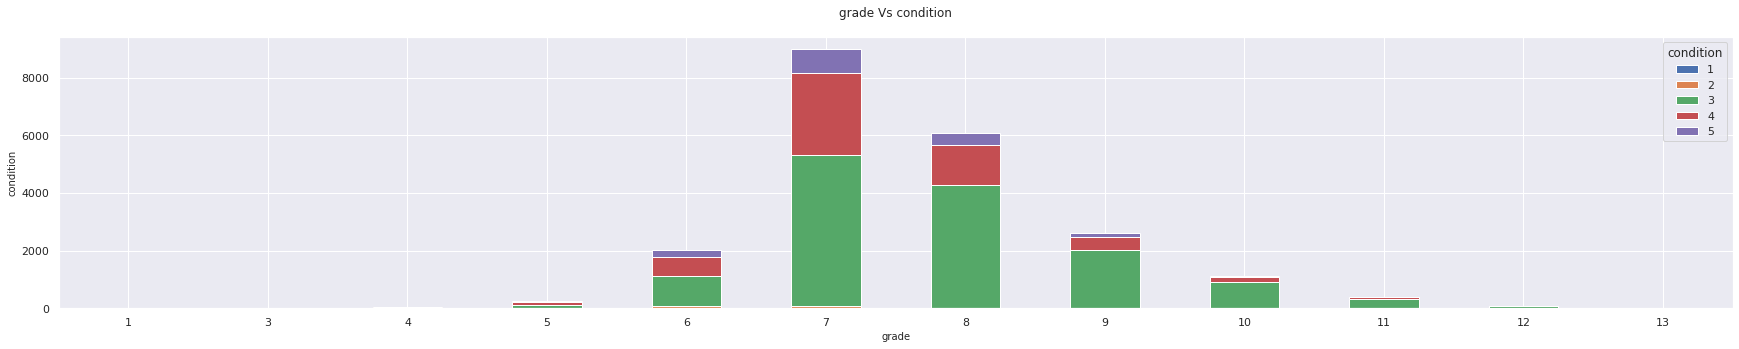

In [289]:
# Count plot
CrosstabPlot('grade', 'condition', 0, house_price)

* Most houses have a condition of 3 (average).
* Most houses also have a grade of 7 (avergae), followed by 8 and 9.
* Therefore, most houses were of average grade, and of average condition.

*City Vs Grade* 

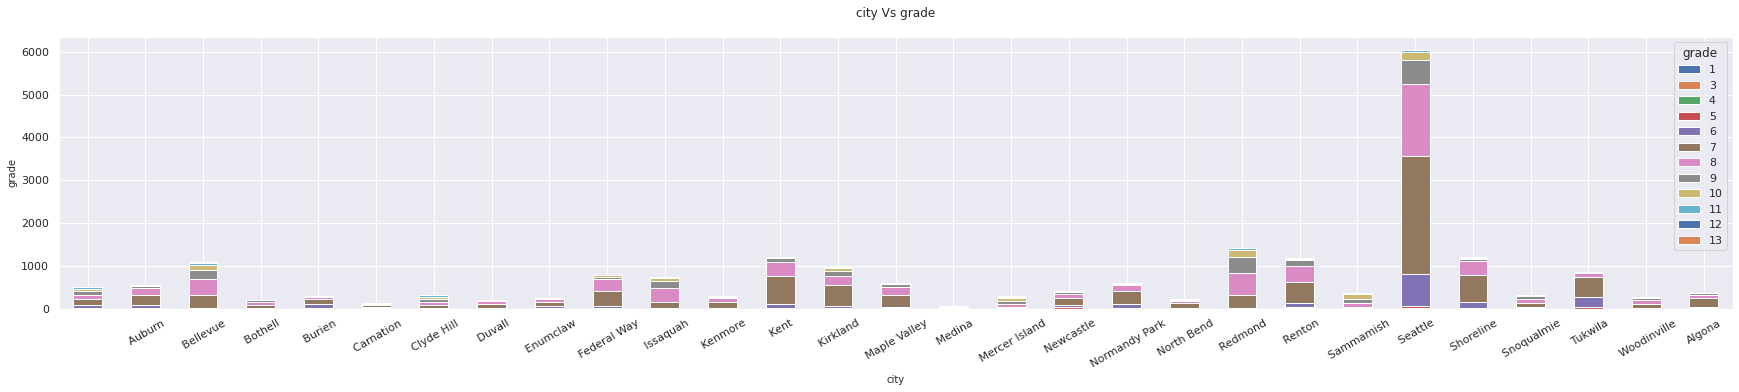

In [290]:
# Count plot
CrosstabPlot('city', 'grade', 30, house_price)

* The cities have different house grades.
* Seattle has the highest number of houses.
* Grade 7 houses are prevalent in most cities.

*City Vs Condition* 

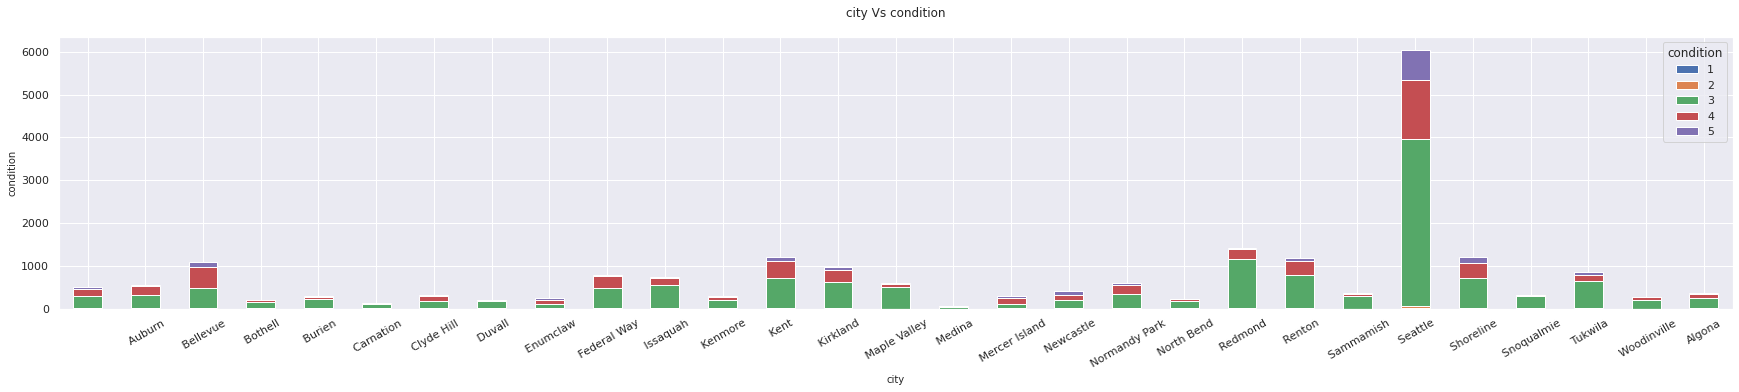

In [291]:
# Count plot
CrosstabPlot('city', 'condition', 30, house_price)

* Most houses have an average condition of 3 across all cities.
* Seattle has the highest number of houses with a great condtions of 4 and 5.


*City Vs Waterfront* 

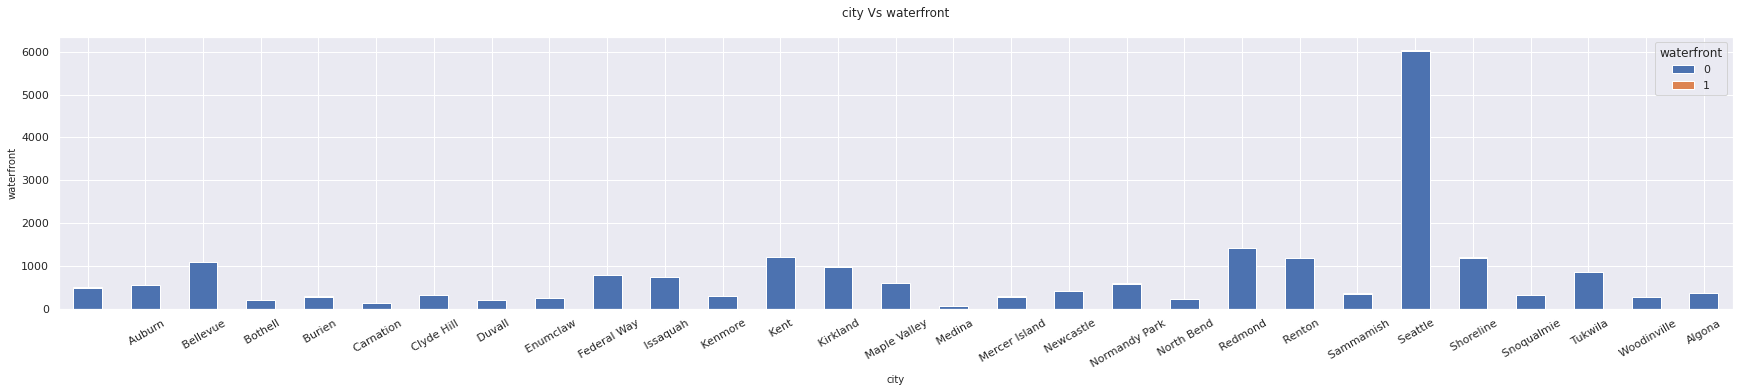

In [292]:
# Count plot
CrosstabPlot('city', 'waterfront', 30, house_price)

From the graph, it can be seen that most houses in all cities did not have waterfronts.

#### Numerical - Numerical

*Function Definition*

In [293]:
# Pearson Correlation
def Corr(x,y,data):
  corr = data[[x,y]].corr()
  print(f'Correlation Matrix : \n{corr}')

In [294]:
# Numerical-numerical plots
def LineScatterPlots(x, y, data1, data2):
  fig, ax = plt.subplots(1, 2, figsize = (15, 5))
  # sns.scatterplot(data[x], data[y], ax = ax[0], color = 'green')
  # ax[0].set_title(f'Scatter Plot: {x} - {y}', y = 1.05)
  sns.lineplot(data1[x], data1[y], color = 'green', marker='o', ci=None, ax = ax[0])
  ax[0].set_title(f'Line Plot: {x} - {y} (With outliers)', y = 1.05)
  sns.lineplot(data2[x], data2[y], color = 'green', marker='o', ci=None, ax = ax[1])
  ax[1].set_title(f'Line Plot: {x} - {y} (Without outliers)', y = 1.05)
  plt.show()
  print('\nCorrelation - with outliers\n')
  Corr(x, y, data1)
  print('\nCorrelation - without outliers\n') 
  Corr(x, y, data2) 

In [295]:
# Pairplot Function
def PairPlot(data):
  cols = data.columns.values
  plot = sns.pairplot(data)
  plot.fig.set_size_inches(10,5)
  plot.fig.suptitle(f'Pairplot: {cols[0]} - {cols[1]}', y = 1.05)
  # plt.title()
  plt.show()
  print('\nCorrelation\n')
  Corr(cols[0], cols[1], data)

*Price Vs Number of bedrooms*

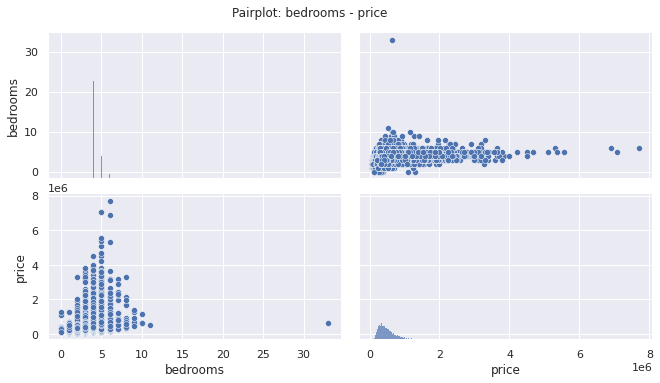


Correlation

Correlation Matrix : 
          bedrooms     price
bedrooms  1.000000  0.308314
price     0.308314  1.000000


In [296]:
# Pairplot
PairPlot(house_price[[columns[1], columns[0]]])

The correlation between the number of bedrooms and the house price is weak but positive.

*Price Vs Number of bathrooms*

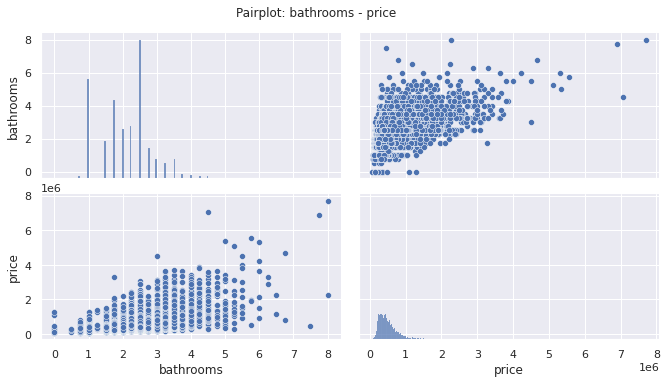


Correlation

Correlation Matrix : 
           bathrooms     price
bathrooms   1.000000  0.525143
price       0.525143  1.000000


In [297]:
# Pairplot
PairPlot(house_price[[columns[2], columns[0]]])

The correlation between the number of bathrooms and the house price is moderate and positive.

*Price Vs Square feet area of living area*

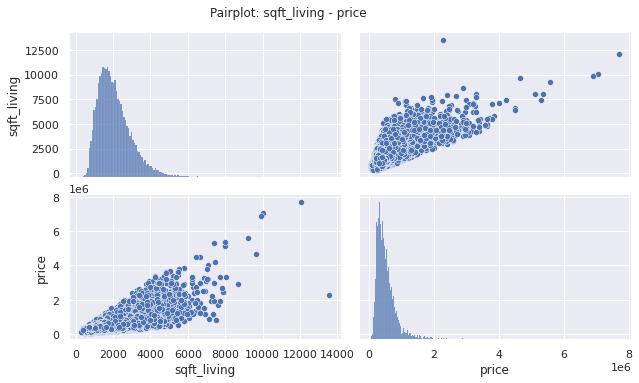


Correlation

Correlation Matrix : 
             sqft_living     price
sqft_living     1.000000  0.702044
price           0.702044  1.000000


In [298]:
# Pairplot
PairPlot(house_price[[columns[3], columns[0]]])

There is a strong and positive correlation between the square feet area of living area and the house price.

*Price Vs Square feet area of parking Layout*

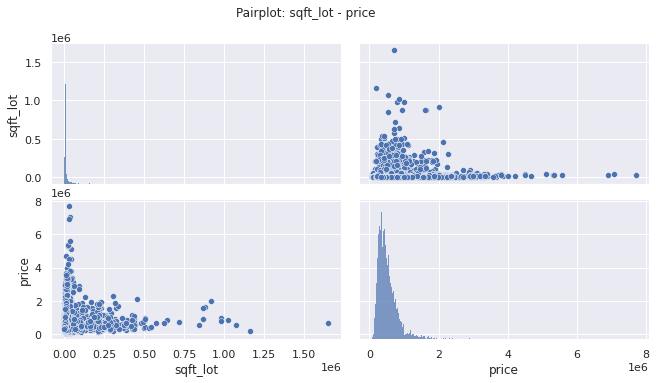


Correlation

Correlation Matrix : 
          sqft_lot     price
sqft_lot  1.000000  0.089647
price     0.089647  1.000000


In [299]:
# Pairplot
PairPlot(house_price[[columns[4], columns[0]]])

The correlation between the square feet area of parking layout and the house price is very weak but positive.

*Price Vs Number of floors*


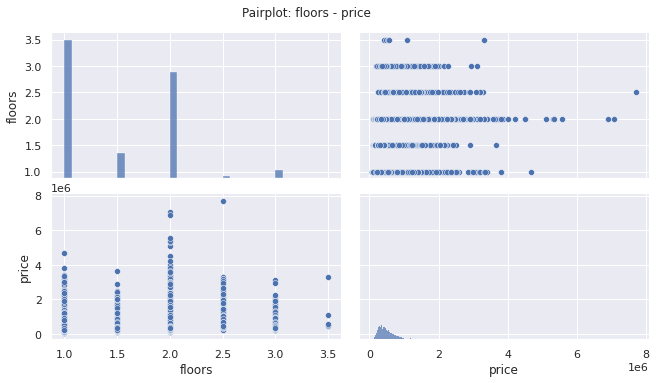


Correlation

Correlation Matrix : 
          floors     price
floors  1.000000  0.256885
price   0.256885  1.000000


In [300]:
# Pairplot
PairPlot(house_price[[columns[5], columns[0]]])

The correlation between the number of floors and the house price is weak and positive.

*Price Vs Number of views*

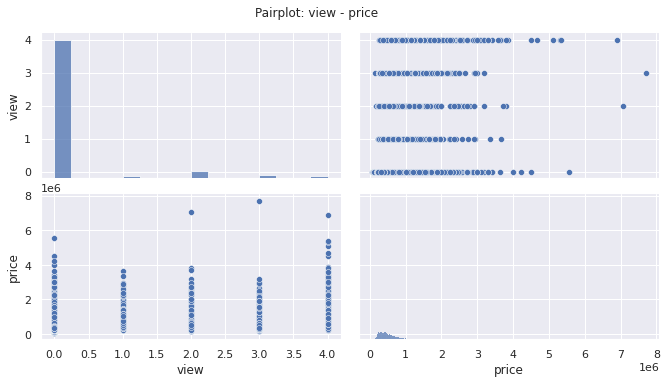


Correlation

Correlation Matrix : 
           view     price
view   1.000000  0.397462
price  0.397462  1.000000


In [301]:
# Pairplot
PairPlot(house_price[[columns[7], columns[0]]])

The correlation between the number of views and the house price is weak and positive.

*Price Vs Square feet above*

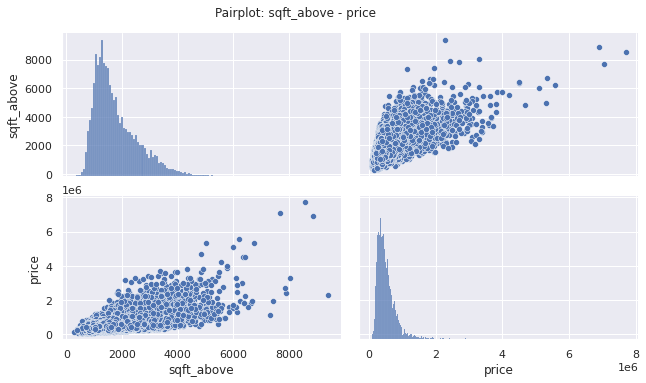


Correlation

Correlation Matrix : 
            sqft_above     price
sqft_above    1.000000  0.605557
price         0.605557  1.000000


In [302]:
# Pairplot
PairPlot(house_price[[columns[10], columns[0]]])

The correlation between the square feet above and the house price is moderate and positive.

*Price Vs Basement (Square feet)*

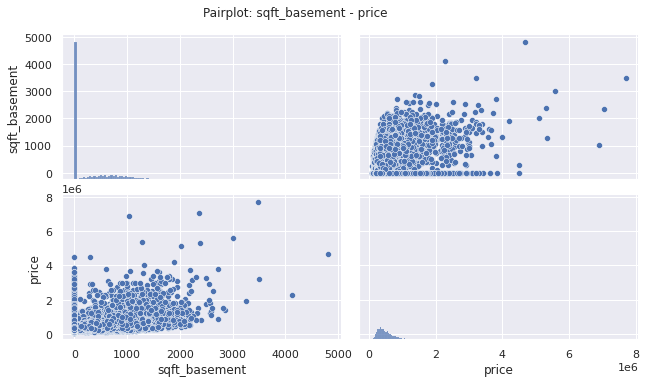


Correlation

Correlation Matrix : 
               sqft_basement    price
sqft_basement        1.00000  0.32386
price                0.32386  1.00000


In [303]:
# Pairplot
PairPlot(house_price[[columns[11], columns[0]]])

The correlation between the size of the basement in square feet and the house price is weak and positive.

*Price Vs Number of views*

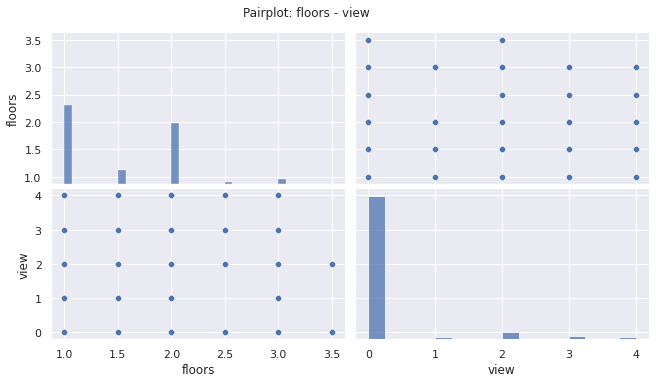


Correlation

Correlation Matrix : 
          floors      view
floors  1.000000  0.029383
view    0.029383  1.000000


In [304]:
# Pairplot
PairPlot(house_price[[continuous[11], continuous[1]]])

The correlation between the number of views and the house price is very weak and positive.

*Price Vs Year the house was built*

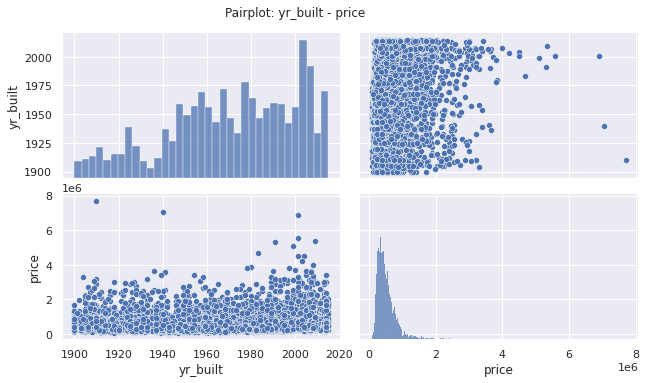


Correlation

Correlation Matrix : 
          yr_built     price
yr_built  1.000000  0.054032
price     0.054032  1.000000


In [305]:
# Pairplot
PairPlot(house_price[[columns[12], columns[0]]])

The correlation between the year the house was built and the house price is very weak and positive.

*Price Vs Year the house was renovated*

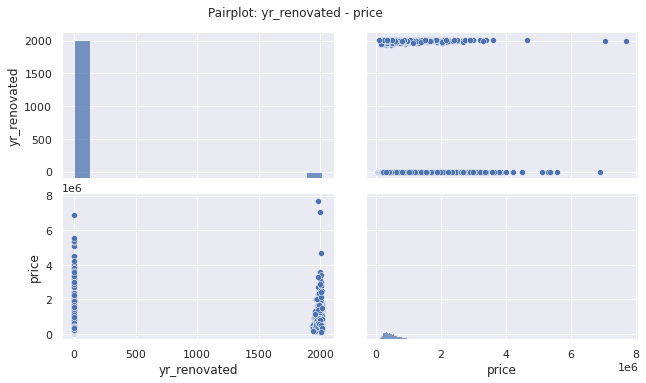


Correlation

Correlation Matrix : 
              yr_renovated     price
yr_renovated      1.000000  0.126498
price             0.126498  1.000000


In [306]:
# Pairplot
PairPlot(house_price[[columns[13], columns[0]]])

The correlation between the year the house was renovated and the house price is very weak and positive.

*Price Vs Zip code*

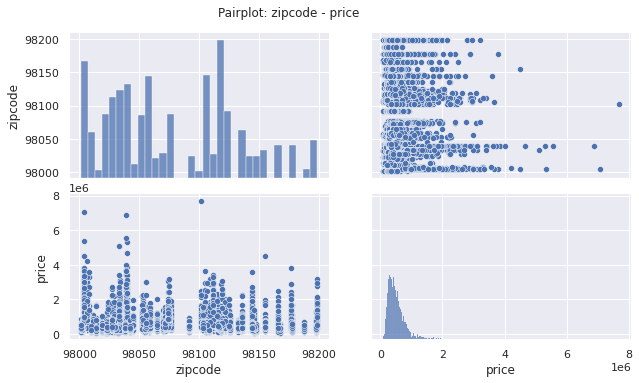


Correlation

Correlation Matrix : 
          zipcode     price
zipcode  1.000000 -0.053144
price   -0.053144  1.000000


In [307]:
# Pairplot
PairPlot(house_price[[columns[14], columns[0]]])

The correlation between the zip code and the house price is very weak and negative.

*Price Vs Lattitude*

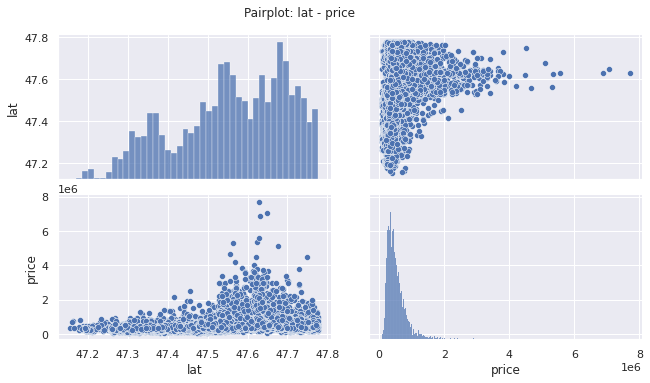


Correlation

Correlation Matrix : 
            lat     price
lat    1.000000  0.306917
price  0.306917  1.000000


In [308]:
# Pairplot
PairPlot(house_price[[columns[15], columns[0]]])

The correlation between the lattitude and the house price is weak and positive.

*Price Vs Longitude*

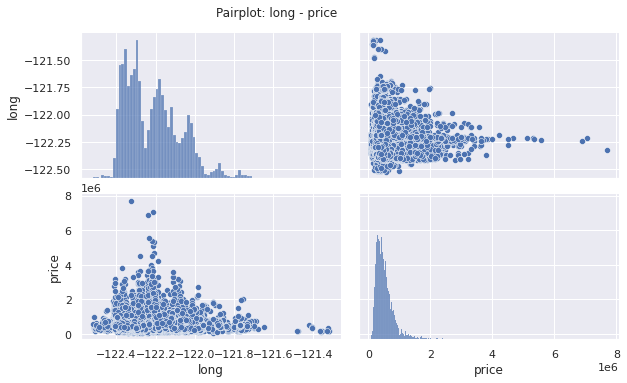


Correlation

Correlation Matrix : 
           long     price
long   1.000000  0.021531
price  0.021531  1.000000


In [309]:
# Pairplot
PairPlot(house_price[[columns[16], columns[0]]])

The correlation between the longitude and the house price is very weak and positive.

*Price Vs Square feet area of living area (15)*

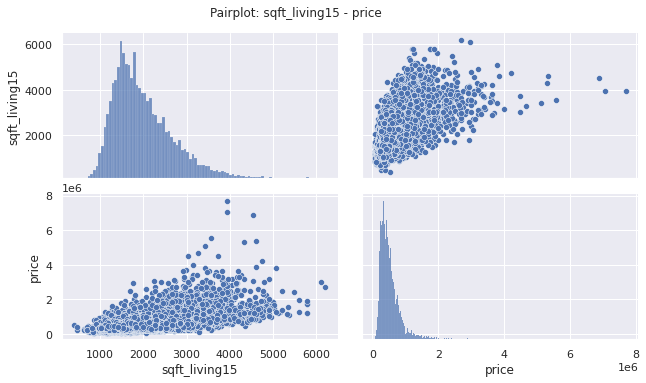


Correlation

Correlation Matrix : 
               sqft_living15     price
sqft_living15       1.000000  0.585373
price               0.585373  1.000000


In [310]:
# Pairplot
PairPlot(house_price[[columns[17], columns[0]]])

The correlation between the square feet area of living area (15) and the house price is moderate and positive.

*Price Vs Square feet area of parking Layout (15)*

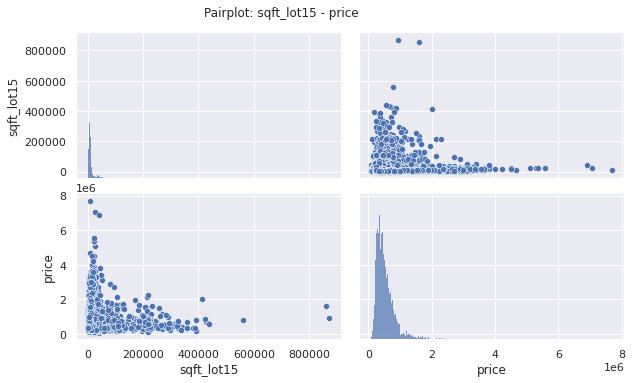


Correlation

Correlation Matrix : 
            sqft_lot15     price
sqft_lot15    1.000000  0.082443
price         0.082443  1.000000


In [311]:
# Pairplot
PairPlot(house_price[[columns[18], columns[0]]])

The correlation between the square feet area of parking Layout (15) and the house price is very weak and positive.

***Building trend over the years***

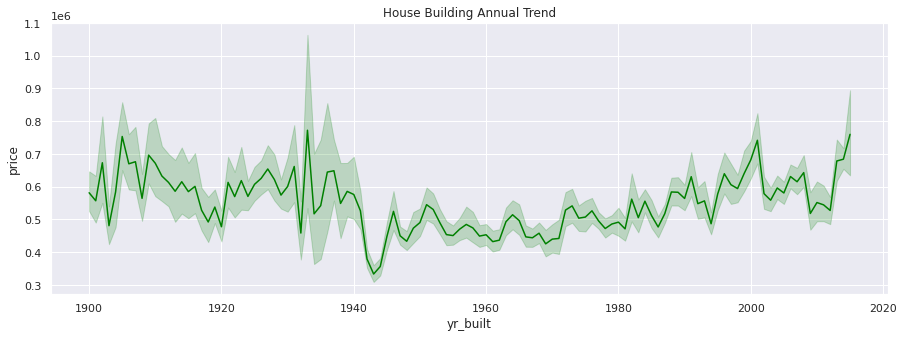

In [ ]:
# Building Trend
# Line plot
fig, ax = plt.subplots(figsize = (15, 5))
sns.lineplot(house_price['yr_built'], house_price['price'], color = 'green')
plt.title('House Building Annual Trend')
plt.show()

Prices are unstable, however the general trend is a dip in the 1920's, follwed by a rise in the 1930's, before and overall fall upto the 1980's. From this point onwards, the price generally inceases. Towards and during 2015, the prices were increasing to the all time high seen in the 1930's.

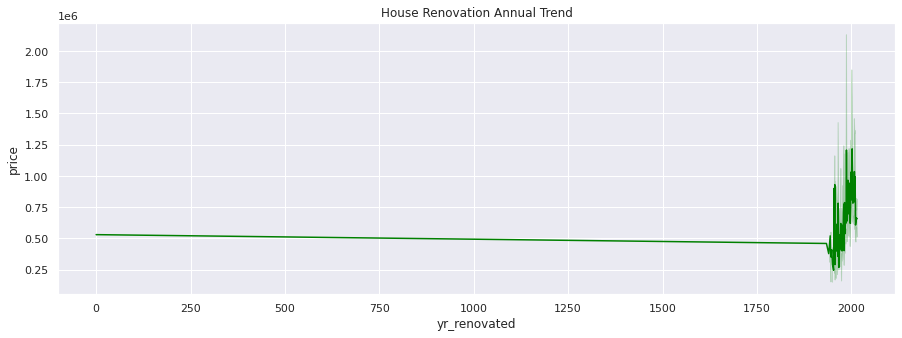

In [441]:
# Renovation Trend
# Line plot
fig, ax = plt.subplots(figsize = (15, 5))
sns.lineplot(house_price['yr_renovated'], house_price['price'], color = 'green')
plt.title('House Renovation Annual Trend')
plt.show()

Renovation leads to an increase in the price of the house in subsequent years of late 1990's to the 2000's onwards.

#### Numerical - Categorical

In [312]:
# Bar plot function
def BarPlotBiv(x,y, rot, data):
  fig, ax = plt.subplots(figsize = (20,5))
  sns.barplot(data[x], data[y], palette = 'viridis')
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.xticks(rotation = rot)
  plt.show()

In [313]:
# Categorical columns
categorical

['waterfront', 'condition', 'grade', 'city']

*Price Vs Waterfront*

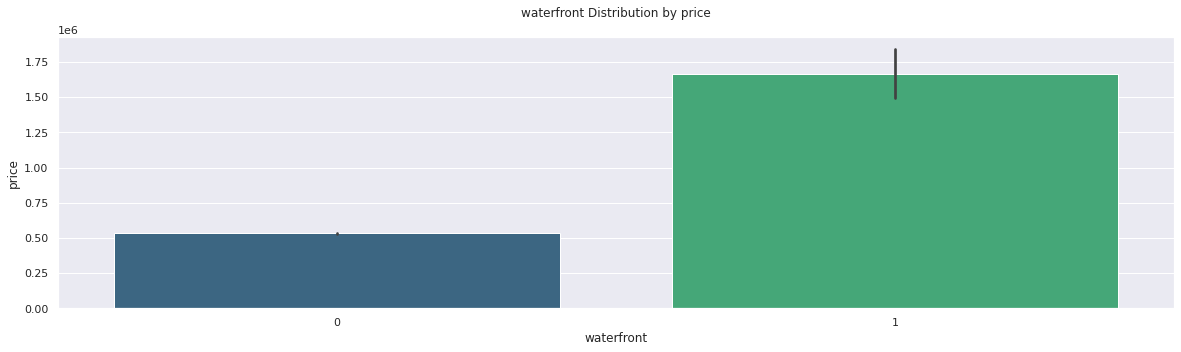

In [314]:
# Bar plot
BarPlotBiv( 'waterfront', 'price', 0, house_price)

Houses with waterfronts have a higher price.

*Price Vs Condition*

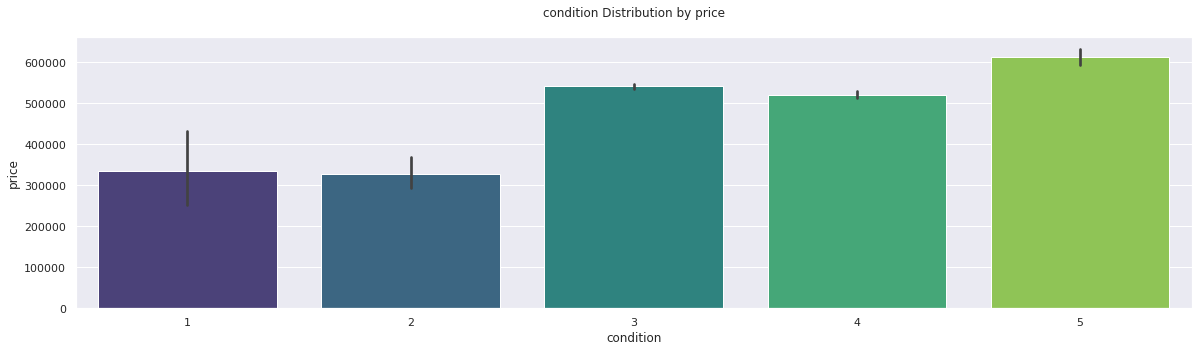

In [315]:
# Bar plot
BarPlotBiv( 'condition', 'price', 0, house_price)

The better the condition of the house, the higher the price.

*Price Vs Grade*

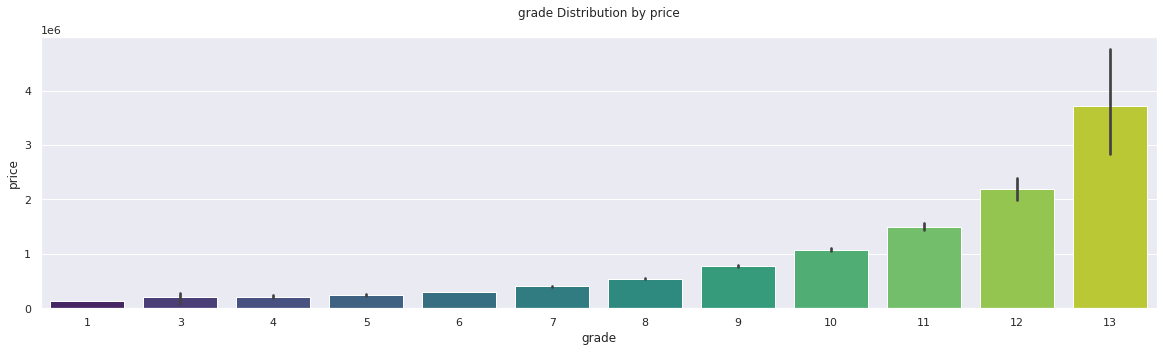

In [316]:
# Bar plot
BarPlotBiv( 'grade', 'price', 0, house_price)

The price of the house gradually increases with increase in its grade.

*Price Vs City*

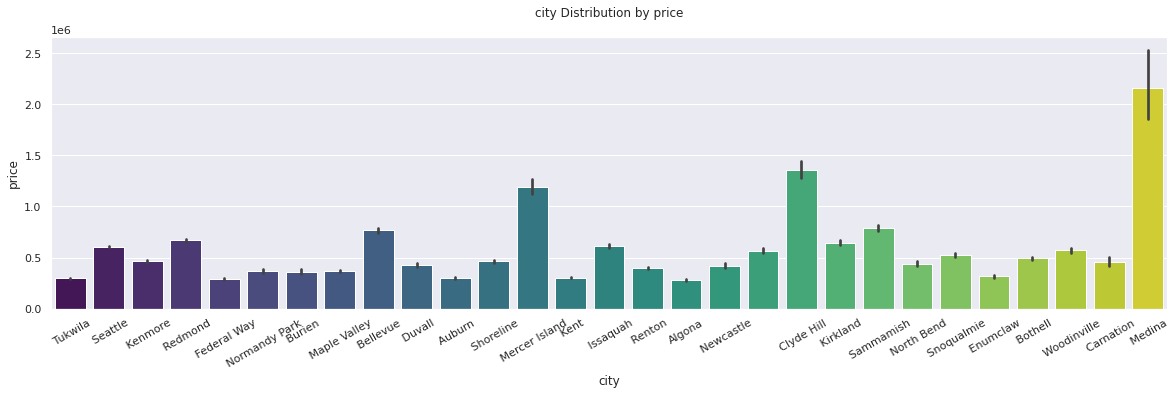

In [317]:
# Bar plot
BarPlotBiv( 'city', 'price', 30, house_price)

Medina, Clyde Hill and Shoreline cities have the highest house prices.

**Multivariate Analysis**

Multivariate analysis will be performed in the modelling section in order to asses its effect on model performance.

## 6. Modelling

**Label Encoding of the City Column**

In [318]:
# Dataset with outliers
house_price[['city']] = house_price[['city']].apply(LabelEncoder().fit_transform)
house_price.city.head()

0    26
1    23
2    11
3    23
4    20
Name: city, dtype: int64

In [319]:
# Dataset without outliers
house_price_no[['city']] = house_price_no[['city']].apply(LabelEncoder().fit_transform)
house_price_no.city.head()

0    25
2    11
3    22
4    19
6     9
Name: city, dtype: int64

**Exploratory Train-test-split**

In [320]:
# Features and labels

# Dataset with outliers
Xo = house_price.drop('price', 1).values
yo = house_price.values.reshape(-1, 1)

# Dataset without outliers
Xno = house_price_no.drop('price', 1).values
yno = house_price_no.price.values.reshape(-1, 1)

In [321]:
# Columns
columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'city']

In [322]:
# Year columns
# Max values for the year built column.
print(f'With outliers : {house_price.yr_built.max()}')
print(f'Without outilers: {house_price_no.yr_built.max()}')

With outliers : 2015
Without outilers: 2015


In [323]:
# Max values for the year renovated column.
print(f'With outliers : {house_price.yr_renovated.max()}')
print(f'Without outilers: {house_price_no.yr_renovated.max()}')

With outliers : 2015
Without outilers: 0


In [324]:
# After dropping outliers, information on the year of renovation is lost.
house_price_no.yr_renovated.unique()

array([0])

To avoid loss of information of the year of renovation, the outliers will be retained, but the dataset without outliers will also be analyzed.

**Multicollinearity Check**

In [325]:
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

In [326]:
# VIF function call
VIF(house_price)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
price,3.331458,0.301130,-0.286333,-1.964847e+01,-0.048077,-0.030795,-0.457770,-0.369086,-0.157028,-1.023679,1.649029e+01,8.940499e+00,0.696712,-0.073500,0.296140,-0.755000,0.275893,-0.135320,0.091949,-0.023059
bedrooms,0.301130,1.680413,-0.488560,8.571407e-01,0.044882,0.042574,0.022990,0.082273,-0.062975,0.215006,-1.937959e+00,-9.104806e-01,0.200644,0.040230,0.080740,-0.022423,0.039213,0.014283,0.099036,0.042866
bathrooms,-0.286333,-0.488560,3.377308,2.358254e+01,-0.019811,-0.668014,0.048044,-0.011932,-0.125761,-0.181078,-2.240875e+01,-1.232481e+01,-0.999079,-0.255286,0.044533,0.029271,0.033633,0.102482,0.057802,-0.046413
sqft_living,-19.410928,1.117438,23.760887,1.337500e+15,-5.064947,2.228485,4.730324,-2.780376,-0.304977,33.175698,-1.205914e+15,-6.445188e+14,-16.484071,-2.966966,5.455906,-0.166296,8.068912,-5.213034,5.404963,-4.374254
sqft_lot,-0.048077,0.044882,-0.019811,-5.071733e+00,2.103209,0.046059,0.033863,-0.053892,0.032631,-0.039092,4.396261e+00,2.408288e+00,0.088412,0.022263,-0.004574,0.064666,-0.136913,0.165760,-1.461073,-0.003578
floors,-0.030795,0.042574,-0.668014,2.034041e+00,0.046059,2.029878,-0.006333,-0.041425,0.084144,-0.223340,-2.298012e+00,-3.618139e-01,-0.499807,-0.083472,-0.071234,-0.100939,0.174145,0.269056,0.051106,-0.175303
waterfront,-0.457770,0.022990,0.048044,4.744340e+00,0.033863,-0.006333,1.268310,-0.440798,0.010799,0.190780,-4.202567e+00,-2.209224e+00,-0.113284,-0.054553,-0.047271,0.107951,-0.014297,0.074275,-0.025205,0.053176
view,-0.369086,0.082273,-0.011932,-2.629957e+00,-0.053892,-0.041425,-0.440798,1.477459,-0.001829,-0.071226,2.566206e+00,1.080657e+00,0.077748,-0.029863,-0.200587,0.197077,0.038017,-0.309123,-0.012158,0.049131
condition,-0.157028,-0.062975,-0.125761,-3.307672e-01,0.032631,0.084144,0.010799,-0.001829,1.259757,-0.005057,4.109049e-01,8.681775e-02,0.533652,0.212073,0.105981,0.091364,-0.025034,0.084119,-0.024192,0.072020
grade,-1.023679,0.215006,-0.181078,3.344041e+01,-0.039092,-0.223340,0.190780,-0.071226,-0.005057,3.733555,-3.131607e+01,-1.640991e+01,-0.850383,-0.048160,-0.024598,-0.102323,0.306472,-0.869850,0.047076,0.035871


In [327]:
# VIF variables
vif = VIF(house_price)

In [328]:
# Function to obtain columns with a high VIF.
def Vif(data):
  columns = data.columns.tolist()
  indices = data.index.tolist()
  high_vif = {}
  # Filter out columns with a VIF > 5.
  for index, column in zip(indices, columns):
    if index == column:
      if data.loc[index, column] > 5:
        high_vif[index] = data.loc[index, column]
      else:
        pass
      pass
  return high_vif

In [329]:
# Funtion call results.
Vif(vif)

{'sqft_above': 1087273257188301.6,
 'sqft_basement': 310582826421065.56,
 'sqft_living': 1337499971677834.2}

In [330]:
# Datasets without columns with multicollinearity.
cols = Vif(vif)
cols = list(cols.keys())
# Dataset with outliers
house_price_m = house_price.drop(cols, axis = 1)
# Dataset without outliers
house_price_no_m = house_price_no.drop(cols, axis = 1)

In [331]:
# Checking changes
print(f'With outliers: {cols in house_price_m.columns.tolist()}')
print(f'Without outliers: {cols in house_price_no_m.columns.tolist()}')

With outliers: False
Without outliers: False


The columns have been removed.

All datasets will be used to assess model performance.

### a) Multiple Linear Regression

Conditions:
* Variables should have a linear relationship.
* Varaiables should be multivariate normal.
* There should be homoscedasticity.
* There should be no multicollinearity.
* There should ne no autocorrelation.

Scaling will be used to normalize the range of predictor variables of the data.

**Train-Test-Split**

In [332]:
# Checking columns
house_price_m.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'city'],
      dtype='object')

In [333]:
# General train and test sets to predict house prices for houses built in 2015.
# With outliers
Xo_train = house_price_m[(house_price_m.yr_built < 2015)].drop('price', axis = 1).values
Xo_test = house_price_m[(house_price_m.yr_built >= 2015)].drop('price', axis = 1).values
yo_train = house_price_m[(house_price_m.yr_built < 2015)]['price'].values.reshape(-1, 1)
yo_test = house_price_m[(house_price_m.yr_built >= 2015)]['price'].values.reshape(-1, 1)

In [334]:
# General train and test sets to predict house prices for houses built in 2015.
# Without outliers
Xno_train = house_price_no_m[(house_price_m.yr_built < 2015)].drop('price', axis = 1).values
Xno_test = house_price_no_m[(house_price_m.yr_built >= 2015)].drop('price', axis = 1).values
yno_train = house_price_no_m[(house_price_m.yr_built < 2015)]['price'].values.reshape(-1, 1)
yno_test = house_price_no_m[(house_price_m.yr_built >= 2015)]['price'].values.reshape(-1, 1)

In [335]:
# Scaling numerical columns
# cols = Vif(vif)
# cols = list(cols.keys())
# continuous2 = continuous.copy()
# for column in cols:
#   continuous2.remove(column)

# cols2 = ['price']
# for column in cols2:
#   continuous2.remove(column)

# Scaling
# sc = StandardScaler()
# Xo_train[continuous2] = sc.fit_transform(Xo_train[continuous2])
# Xo_test[continuous2] = sc.transform(Xo_test[continuous2])
# Xno_train[continuous2] = sc.fit_transform(Xno_train[continuous2])
# Xno_test[continuous2] = sc.transform(Xno_test[continuous2])

In [336]:
# Obtianing 2D arrays
# Xo_train = Xo_train .values
# Xo_test = Xo_test .values
# yo_train = yo_train.values.reshape(-1, 1)
# yo_test = yo_test.values.reshape(-1, 1)
# Xno_train = Xno_train .values
# Xno_test = Xno_test .values
# yno_train = yno_train.values.reshape(-1, 1)
# yno_test = yno_test.values.reshape(-1, 1)

In [337]:
# Scaling function
def Scaling(X_train, X_test):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test

In [338]:
# LDA function
def Lda(X_train, X_test, y_train, components = None):
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  return X_train, X_test

In [339]:
# Linear regression model function.
def Linear(X_train, X_test, y_train, y_test, cols):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Regression
  regression=LinearRegression()
  regression.fit(X_train, y_train)
  y_pred = regression.predict(X_test)
  # Result
  rmse = mean_squared_error(y_test, y_pred, squared = False)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  # Number of records
  n = house_price_m.shape[0] 
  # Number of predictor variables
  c = len(house_price_m.columns.tolist())
  adjusted_r2 = 1 - (((1- r2) * (n - 1)) / (n - c - 1))
  # Displaying the results
  print(f'RMSE: {rmse} \n')
  print(f'MSE: {mse} \n')
  print(f'R2_Score: {r2}\n')
  print(f'Adjusted r2: {adjusted_r2}\n') 
  print('Coefficients \n')
  # Model coefficients
  coef = regression.coef_
  # Coefficients dataframe
  df = pd.DataFrame({'Variable': cols, 'Coef': coef.flatten()})
  # Sorting the values in descending order to conveniently obtain predictor
  # variables with the most weight.
  df.sort_values('Coef', ascending = False, inplace = True)
  # Displaying the coefficients dataframe
  print(df)

In [340]:
# Linear regression model function with LDA.
def Linear_LDA(X_train, X_test, y_train, y_test, cols, components = None):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # LDA
  X_train, X_test = Lda(X_train, X_test, y_train, components)
  # Regression
  regression=LinearRegression()
  regression.fit(X_train, y_train)
  y_pred = regression.predict(X_test)
  # Result
  rmse = mean_squared_error(y_test, y_pred, squared = False)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  # Number of records
  n = house_price_m.shape[0]
  # Number of predictor variables
  c = len(house_price_m.columns.tolist())
  adjusted_r2 = 1 - (((1- r2) * (n - 1)) / (n - c - 1))
  # Displaying the results
  print(f'RMSE: {rmse} \n')
  print(f'MSE: {mse} \n')
  print(f'R2_Score: {r2}\n')
  print(f'Adjusted r2: {adjusted_r2}\n') 
  # print('Coefficients \n')
  # coef = regression.coef_
  # df = pd.DataFrame({'Variable': cols, 'Coef': coef.flatten()})
  # print(df)

In [341]:
# Heteroscedasticity and residual plot
def Linear_RH(X_train, X_test, y_train, y_test):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Regression
  regression=LinearRegression()
  regression.fit(X_train, y_train)
  y_pred = regression.predict(X_test)
  # Residuals
  ypred = y_pred.flatten()
  ytest = y_test.flatten()
  residuals = np.subtract(ypred, ytest)
  print('Residuals Description')
  print(pd.DataFrame(residuals).describe())
  mean = residuals.mean()
  print(f'\nResiduals mean: {mean}')
  
  # Residual plot
  plt.scatter(ypred, residuals, color='black')
  plt.ylabel('Residuals')
  plt.xlabel('Fitted Values')
  plt.axhline(y= mean, color='red', linewidth=1)
  plt.show()

  # Bartlett's test
  test_statistic, p_value = bartlett(ypred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(ypred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  # Displaying results
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')

In [342]:
# Polynomial Regression function
def Polynomial(degrees, X_train, X_test, y_train, y_test, cols):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degrees)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Results
  rmse_poly = mean_squared_error(y_test, y_pred_poly , squared = False)
  mse = mean_squared_error(y_test, y_pred_poly)
  r2 = r2_score(y_test, y_pred_poly)
  # Number of records
  n = house_price_m.shape[0] 
  # Number of predictor variables
  c = len(house_price_m.columns.tolist())
  adjusted_r2 = 1 - (((1- r2) * (n - 1)) / (n - c - 1))
  # Displaying results
  print(f'RMSE: {rmse_poly} \n')
  print(f'MSE: {mse} \n')
  print(f'R2_Score: {r2}\n')
  print(f'Adjusted r2: {adjusted_r2}\n')  
  # print('Coefficients \n')
  # coef = poly_reg.coef_
  # df = pd.DataFrame({'Variable': cols, 'Coef': coef.flatten()})
  # print(coef)

In [343]:
# Polynomial Regression function with LDA.
def Polynomial_LDA(degrees, X_train, X_test, y_train, y_test, cols, components = None):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # LDA
  X_train, X_test = Lda(X_train, X_test, y_train, components)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degrees)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Reslts
  rmse_poly = mean_squared_error(y_test, y_pred_poly , squared = False)
  mse = mean_squared_error(y_test, y_pred_poly)
  r2 = r2_score(y_test, y_pred_poly)
  # Number of records
  n = house_price_m.shape[0] 
  # Number of predictor variables
  c = len(house_price_m.columns.tolist())
  adjusted_r2 = 1 - (((1- r2) * (n - 1)) / (n - c - 1))
  # Displaying results
  print(f'RMSE: {rmse_poly} \n')
  print(f'MSE: {mse} \n')
  print(f'R2_Score: {r2}\n')
  print(f'Adjusted r2: {adjusted_r2}\n')  
  # print('Coefficients \n')
  # coef = poly_reg.coef_
  # df = pd.DataFrame({'Variable': cols, 'Coef': coef.flatten()})
  # print(coef)

In [344]:
# Plynomial Residul plot and Heteroskedasticity without LDA
def Polynomial_RH(degree, X_train, X_test, y_train, y_test):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degree)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Obtaining ID arrays
  ypred = y_pred_poly.flatten()
  ytest = y_test.flatten()
  # Residuals
  residuals = np.subtract(ypred, ytest)
  print('Residuals Description')
  print(pd.DataFrame(residuals).describe())
  mean = residuals.mean()
  print(f'\nResiduals mean: {mean}')
  
  # Residual plot
  plt.scatter(ypred, residuals, color='black')
  plt.ylabel('Residuals')
  plt.xlabel('Fitted Values')
  plt.axhline(y= mean, color='red', linewidth=1)
  plt.show()

  # Bartlett's test
  test_statistic, p_value = bartlett(ypred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(ypred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  # Displaying results
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')

*Multiple Linear Regression With Outliers*

In [345]:
# Columns
cols =  house_price_m.drop('price', axis = 1).columns.tolist()
# Model fitting
Linear(Xo_train, Xo_test, yo_train, yo_test, cols)

RMSE: 317339.56189711177 

MSE: 100704397545.05081 

R2_Score: 0.41775865518227084

Adjusted r2: 0.4173001974304459

Coefficients 

         Variable           Coef
7           grade  162460.056599
1       bathrooms   81667.634976
11            lat   79818.010658
13  sqft_living15   62535.269877
4      waterfront   53514.642510
5            view   43791.531510
6       condition   17365.711510
2        sqft_lot   11205.900487
9    yr_renovated    8332.856638
3          floors    7254.490676
15           city    2190.288223
0        bedrooms   -2578.909304
14     sqft_lot15   -4624.105429
12           long  -23564.989772
10        zipcode  -29370.849937
8        yr_built  -94550.455248


Though the RMSE is high, the grade, year built, number of bathrooms, the lattitude and the living area in square feet have the most weight when predicting the house price.

In [346]:
# Model fitting with LDA
# Components = None
Linear_LDA(Xo_train, Xo_test, yo_train, yo_test, cols)

RMSE: 317339.56189711165 

MSE: 100704397545.05075 

R2_Score: 0.4177586551822712

Adjusted r2: 0.4173001974304462



In [347]:
# Model fitting with LDA
# Components = 1
Linear_LDA(Xo_train, Xo_test, yo_train, yo_test, cols, components = 1)

RMSE: 317990.1071543149 

MSE: 101117708248.01265 

R2_Score: 0.4153690219052095

Adjusted r2: 0.414908682552379



In [348]:
# Model fitting with LDA
# Components = 2
Linear_LDA(Xo_train, Xo_test, yo_train, yo_test, cols, components = 2)

RMSE: 318010.71978143306 

MSE: 101130817895.90514 

R2_Score: 0.41529322601937857

Adjusted r2: 0.4148328269847482



In [349]:
# Model fitting with LDA
# Components = 3
Linear_LDA(Xo_train, Xo_test, yo_train, yo_test, cols, components = 3)

RMSE: 318640.7299216276 

MSE: 101531914764.98763 

R2_Score: 0.4129742093115699

Adjusted r2: 0.41251198427953173



Perfroming LDA leads to an increase in RMSE (MSE), therefore, normal linear regression for the dataset with outliers has the lowest RMSE.

*Linear Model Heteroscedasticity*

Residuals Description
                  0
count  3.800000e+01
mean  -1.025810e+05
std    3.043335e+05
min   -1.000656e+06
25%   -1.662203e+05
50%   -4.089576e+04
75%    4.524850e+04
max    5.689810e+05

Residuals mean: -102580.9516607587


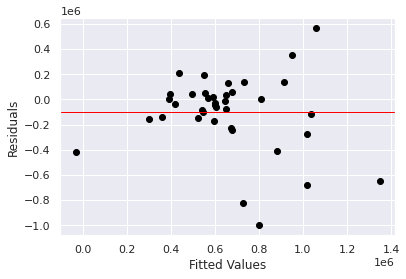


P_Vlaue = 0.2585677214894071
test_statistic = 1.2764093683140283
Critical Value: 43.20737450214419
Variances are equal


In [350]:
# Heteroscedasticity - Residual plot for the linear model with the best perfromance.
Linear_RH(Xo_train, Xo_test, yo_train, yo_test)

The the p-value and test statistic from the Bartlett's test are statistically insignificant. Therefore, there isn't sufficient evidence to reject the null hypothesis of equal variance.

*Multiple Linear Regression Without Outliers*

In [351]:
Linear(Xno_train, Xno_test, yno_train, yno_test, cols)

RMSE: 142625.2629197931 

MSE: 20341965622.940113 

R2_Score: 0.16833194525636153

Adjusted r2: 0.1676770885203429

Coefficients 

         Variable          Coef
11            lat  7.618575e+04
7           grade  7.241512e+04
13  sqft_living15  4.547143e+04
1       bathrooms  2.697687e+04
6       condition  1.859126e+04
3          floors  9.426980e+03
0        bedrooms  7.451439e+03
12           long  1.986070e+03
9    yr_renovated  7.275958e-12
5            view  0.000000e+00
4      waterfront -7.275958e-12
2        sqft_lot -3.178105e+03
15           city -3.246091e+03
10        zipcode -9.196122e+03
14     sqft_lot15 -1.874498e+04
8        yr_built -6.281721e+04


For the training and test sets that had no outliers, the RMSE was lower, however, the r2 score shows that the model is underfitting more. The value shows that it is too low to be used.


*Polynomial Regression With Outliers*

***Model 1***

In [352]:
# Polynomial regression
# Degree 2
Polynomial(2, Xo_train, Xo_test, yo_train, yo_test, cols)

RMSE: 303286.5086508154 

MSE: 91982706329.60112 

R2_Score: 0.46818474725135517

Adjusted r2: 0.46776599508383654



****************************************************************************************************************************************************************

In [353]:
# Polynomial regression
# Degree 3
Polynomial(3, Xo_train, Xo_test, yo_train, yo_test, cols)

RMSE: 328825.5548679417 

MSE: 108126245534.20975 

R2_Score: 0.3748478502960444

Adjusted r2: 0.37435560450887595



In [354]:
# Model fitting with LDA
# Degree = 2
# Components = 1
Polynomial_LDA(2, Xo_train, Xo_test, yo_train, yo_test, cols, components = 1)

RMSE: 313750.2240616256 

MSE: 98439203098.72026 

R2_Score: 0.4308553013353361

Adjusted r2: 0.4304071559033167



In [355]:
# Model fitting with LDA
# Degree = 2
# Components = 2
Polynomial_LDA(2, Xo_train, Xo_test, yo_train, yo_test, cols, components = 2)

RMSE: 312508.09858832275 

MSE: 97661311683.28886 

R2_Score: 0.43535282631819827

Adjusted r2: 0.43490822224443304



In [356]:
# Model fitting with LDA
# Degree = 3
# Components = 1
Polynomial_LDA(3, Xo_train, Xo_test, yo_train, yo_test, cols, components = 1)

RMSE: 318044.02769045543 

MSE: 101152003549.56718 

R2_Score: 0.415170737192875

Adjusted r2: 0.41471024171034976



Normal polynomial regression reduces the RMSE. The optimal independent variable degree is 2. Performing LDA lowers the model's performance.

*Polynomial Regression Without Outliers*

***Model 2***

In [357]:
# Polynomial regression
# Degree 2
Polynomial(2, Xno_train, Xno_test, yno_train, yno_test, cols)

RMSE: 114595.502361245 

MSE: 13132129161.426107 

R2_Score: 0.46310142703176405

Adjusted r2: 0.4626786722498992



****************************************************************************************************************************************************************

In [358]:
# Polynomial regression
# Degree 3
Polynomial(3, Xno_train, Xno_test, yno_train, yno_test, cols)

RMSE: 117638.19938703856 

MSE: 13838745955.02464 

R2_Score: 0.4342118582912413

Adjusted r2: 0.43376635581745493



In [359]:
# Polynomial regression
# Degree 4
Polynomial(4, Xno_train, Xno_test, yno_train, yno_test, cols)

RMSE: 128292.12236769916 

MSE: 16458868661.608696 

R2_Score: 0.3270898428987363

Adjusted r2: 0.3265599923813338



In [360]:
# Model fitting with LDA
# Degree = 2
# Components = 1
Polynomial_LDA(2, Xo_train, Xo_test, yo_train, yo_test, cols, components = 1)

RMSE: 313750.2240616256 

MSE: 98439203098.72026 

R2_Score: 0.4308553013353361

Adjusted r2: 0.4304071559033167



In [361]:
# Model fitting with LDA
# Degree = 2
# Components = 2
Polynomial_LDA(2, Xo_train, Xo_test, yo_train, yo_test, cols, components = 2)

RMSE: 312508.09858832275 

MSE: 97661311683.28886 

R2_Score: 0.43535282631819827

Adjusted r2: 0.43490822224443304



In [362]:
# Model fitting with LDA
# Degree = 2
# Components = 2
Polynomial_LDA(2, Xo_train, Xo_test, yo_train, yo_test, cols, components = 2)

RMSE: 312508.09858832275 

MSE: 97661311683.28886 

R2_Score: 0.43535282631819827

Adjusted r2: 0.43490822224443304



In [363]:
# Model fitting with LDA
# Degree = 3
# Components = 1
Polynomial_LDA(3, Xo_train, Xo_test, yo_train, yo_test, cols, components = 1)

RMSE: 318044.02769045543 

MSE: 101152003549.56718 

R2_Score: 0.415170737192875

Adjusted r2: 0.41471024171034976



For polynomial regression, the optimal order was 2. The model trained on the dataset without outliers has a lower RMSE than the model trained on the dataset with outliers. However, the latter has a higher r2 score of 0.468 (without outliers, r2 score = 0.463). Both will be considered during final model selection.

*Polynomial Model Heteroscedasticity*

Residuals Description
                   0
count      38.000000
mean    -7793.062474
std    307256.167060
min   -927629.004883
25%    -63119.881592
50%      1946.161621
75%    114782.440918
max    799700.872070

Residuals mean: -7793.062474300987


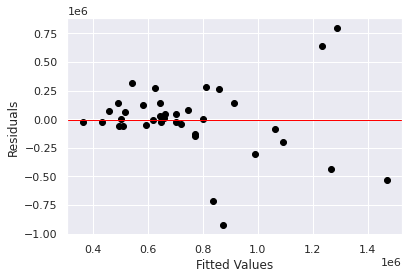


P_Vlaue = 0.30195073181879306
test_statistic = 1.0655589543571962
Critical Value: 41.99276319501222
Variances are equal


In [364]:
# Heteroscedasticity - Residual plot for the polynomial model with the best perfromance.
# With outliers
Polynomial_RH(2, Xo_train, Xo_test, yo_train, yo_test)

The the p-value and test statistic from the Bartlett's test are statistically insignificant. Therefore, there isn't sufficient evidence to reject the null hypothesis of equal variance.

Residuals Description
                   0
count      23.000000
mean    -4833.021182
std    117066.751463
min   -252896.923515
25%    -59395.656200
50%    -23690.289223
75%     46413.054245
max    293848.702812

Residuals mean: -4833.021182184634


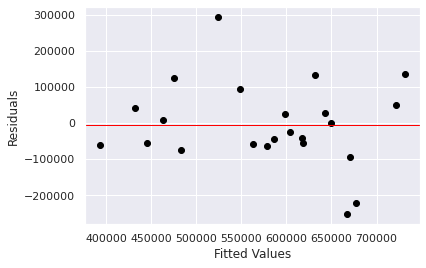


P_Vlaue = 0.3233374747908037
test_statistic = 0.975398557012391
Critical Value: 25.534311767598112
Variances are equal


In [365]:
# Heteroscedasticity - Residual plot for the polynomial model with the best perfromance.
# Without outliers
Polynomial_RH(2, Xno_train, Xno_test, yno_train, yno_test)

The the p-value and test statistic from the Bartlett's test are statistically insignificant. Therefore, there isn't sufficient evidence to reject the null hypothesis of equal variance.

### b) Quantile Regression

1. A single numeric dependent variable is required. 
2. The target variable needs to be a continuous variable. 
3. The predictors can be continuous variables or dummy variables for categorical predictors. 
4. Either the intercept term or at least one predictor is required to run an analysis.
5. Quantile regression does not make assumptions on the distribution of the target variable and resists the influence of outlying observations.

Quantile regression will be used to asses the different factors affecting the price of low, median and high priced houses.

In [366]:
# Train and test sets
# With outliers
Xoq_train = house_price_m[house_price_m['yr_built'] < 2015]
Xoq_test = house_price_m[house_price_m['yr_built'] >= 2015]
# Without outliers
Xnoq_train = house_price_no_m[house_price_no_m['yr_built'] < 2015]
Xnoq_test = house_price_no_m[house_price_no_m['yr_built'] >= 2015]

In [367]:
# Qunatile Regression (Prediction)
def Quantile_Predict(q, y, train, test):
  cols = train.drop('price', 1)  
  for qt in q: 
    model_q = smf.quantreg(f'{y} ~ {" + ".join(cols.columns)}', train)
    result = model_q.fit(q = qt)
    df =  pd.DataFrame({'Actual Price': test.price})
    print(model_q.score)
    # Prediction
    if qt == 0.25:
      df['Predicted Prices (L)'] = model_q.predict(test).values
    elif qt == 0.5:
      df['Predicted Prices (M)'] = model_q.predict(test).values
    elif qt == 0.75:
      df['Predicted Prices (H)'] = model_q.predict(test).values
    
    print(f'Quantile = {qt}')
    print(df)
    # model_q.predict(params=[const, coef], exog = Xoq_test).values

In [368]:
# Qunatile Regression (Summary)
def Quantile_Summary(q, y, cols, data2):  
  for qt in q: 
    model_q = smf.quantreg(f'{y} ~ {" + ".join(cols.columns)}', data2)
    result = model_q.fit(q = qt)
    print(model_q.score)
    print(f'Quantile = {qt}')
    print(result.summary(), '\n')

In [369]:
def Quantile_Linear(q, y, data2, X_train, X_test, y_train):
  cols = data2.drop('price', 1)
  models = []
  params = [] 
  # Linear
  linear = LinearRegression()
  linear.fit(X_train, y_train)
  y_pred = linear.predict(X_test)
  coef_l = linear.coef_
  intercept_l = linear.intercept_
  for qt in q:
    model_q = smf.quantreg(f'{y} ~ {" + ".join(cols.columns)}', data2)
    result = model_q.fit(q = qt)
    intercept_q = result.params['Intercept']
    print(f'Quantile = {qt}')
    print(f'Intercept = {intercept_q }\n')
    coeff_intercept = pd.DataFrame({'Coef_Quantile': result.params[cols.columns].values})
    coeff_intercept['Coef_Linear'] = coef_l.reshape(-1, 1)
    coeff_intercept['Columns'] = cols.columns.tolist()
    coeff_intercept.set_index('Columns', inplace = True)
    coeff_intercept.sort_values('Coef_Quantile', ascending = False, inplace = True)
    # print(coeff_intercept, '\n')
    return coeff_intercept

In [370]:
# Columns with multicollinearity removed.
# Columns
cols = house_price_m.drop('price', axis = 1)
# Percentiles
q = [0.25, 0.5, 0.75]
Quantile_Summary(q, 'price', cols, house_price_m)

<bound method LikelihoodModel.score of <statsmodels.regression.quantile_regression.QuantReg object at 0x7faa48811a10>>
Quantile = 0.25
                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4026
Model:                       QuantReg   Bandwidth:                   1.833e+04
Method:                 Least Squares   Sparsity:                    2.880e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21608
Time:                        22:05:14   Df Residuals:                    21591
                                        Df Model:                           16
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       255.1179      1.566    162.930      0.000     252.049     258.187
bedrooms       1790.4918   1075.338      1.665      0.096    -317.

In [371]:
# Lower house prices
q = [0.25]
low_prices = Quantile_Linear(q, 'price', house_price_m, Xo_train, Xo_test, yo_train)
low_prices

Quantile = 0.25
Intercept = 255.11793671190935



,Coef_Quantile,Coef_Linear
Columns,,
lat,346455.904454,575698.382776
waterfront,203385.044598,617946.770607
grade,85176.583116,138305.633757
bathrooms,47738.549743,106103.883013
long,47523.319377,-167364.453675
view,34982.535451,57127.254920
condition,23535.518190,26670.818210
floors,21176.453855,13454.483925
bedrooms,1790.491832,-2773.583074


In [372]:
# Median house prices
q = [0.5]
median_prices = Quantile_Linear(q, 'price', house_price_m, Xo_train, Xo_test, yo_train)
median_prices

Quantile = 0.5
Intercept = 79.61339591857359



,Coef_Quantile,Coef_Linear
Columns,,
lat,526136.259011,575698.382776
waterfront,481192.222013,617946.770607
grade,98656.214737,138305.633757
bathrooms,60948.642950,106103.883013
view,51507.028978,57127.254920
floors,35117.075851,13454.483925
condition,24717.212525,26670.818210
city,99.309945,278.469950
sqft_living15,84.526261,91.275277


In [373]:
# High house prices
q = [0.75]
high_prices = Quantile_Linear(q, 'price', house_price_m, Xo_train, Xo_test, yo_train)
high_prices

Quantile = 0.75
Intercept = -168.7533826034105



,Coef_Quantile,Coef_Linear
Columns,,
lat,625695.885438,575698.382776
grade,112418.204788,138305.633757
view,81390.150597,57127.254920
bathrooms,74546.357327,106103.883013
waterfront,34561.471672,617946.770607
floors,30920.154335,13454.483925
condition,26091.329721,26670.818210
bedrooms,976.120931,-2773.583074
sqft_living15,99.785605,91.275277


* From the summaries above, by quantile, it can be seen that different factors majorly affect different categories of house prices (low, median and high).
* The pseudo r2 score increase with increase in the quantile, therefore, the model fits the data for higher prices better than that for lower prices.
* In depth conslusions will be made in the solution section.

**Correlation**

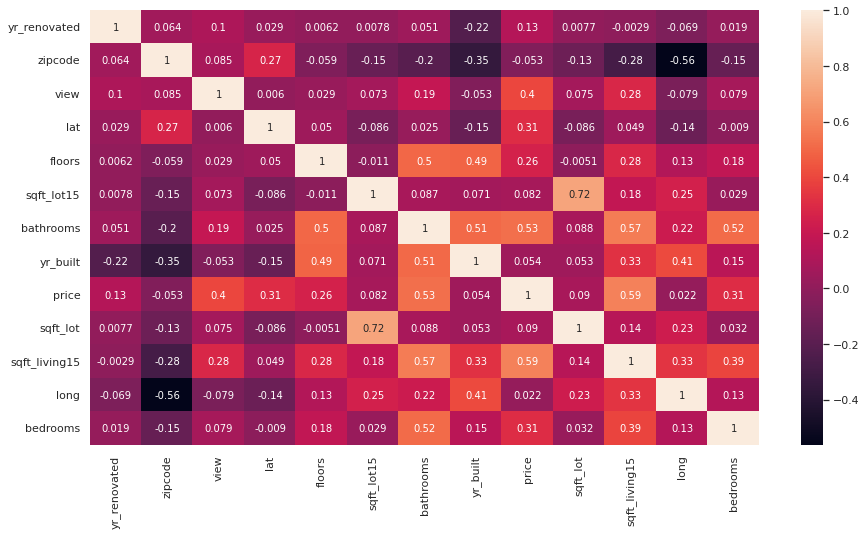

In [ ]:
# Dataset with outliers
# Heatmap
fig, ax = plt.subplots(figsize=(15,8)) 
# Only selecting numerical columns
continuous2 = set(continuous) - set(['sqft_living', 'sqft_basement', 'sqft_above']) - set(categorical)
sns.heatmap(house_price_m[continuous2].corr(), annot = True)
plt.show()

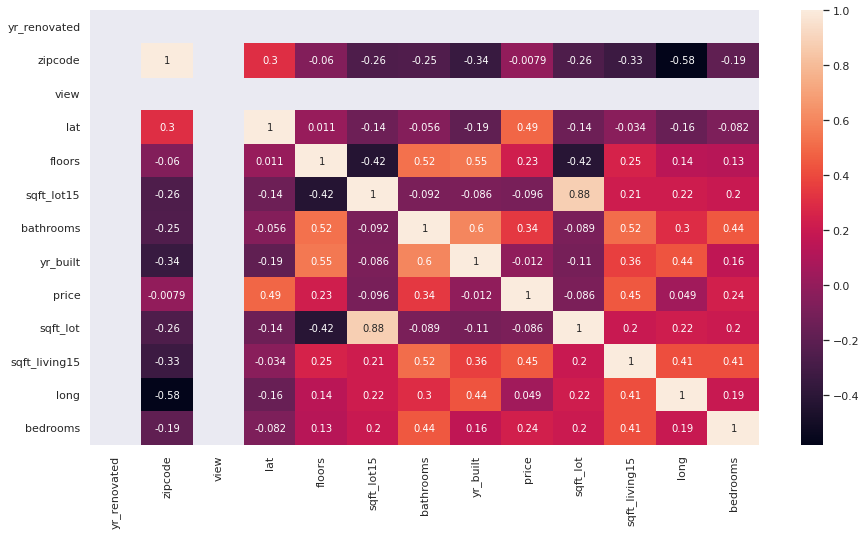

In [424]:
# Dataset without outliers
# Heatmap
fig, ax = plt.subplots(figsize=(15,8)) 
# Only selecting numerical columns
continuous2 = set(continuous) - set(['sqft_living', 'sqft_basement', 'sqft_above']) - set(categorical)
sns.heatmap(house_price_no_m[continuous2].corr(), annot = True)
plt.show()

* Despite the removal of columns with high VIFs, some columns  such as the sqft_lot15, and the sq_lot have a high correlation of 0.72 (with outliers) and (0.88 without outliers). Therefore, Ridge and  Elastic net regresion will be used to model the data, to see if the model performance is better than that of the previous models, with their implementation. 
* Though Lasso regression model doesn't work well with highly correlated predictor variables, it will be implemented to see if shriking and selection of predictor variables will lead to a better model performance.


### c) Ridge Regression

* Ridge regression is uses to estimate the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated.
* It also shrinks predictor variable weights in order to reduce unecessary complexity of the model.

From the regression models above, it can be seen that the predictor variables have very large weights. This moethod will be used to try and reduce the complexity of the model in order to improve its fit to the data.

In [380]:
# Ridge regression grid search function.
def Best_Lambda_Ridge(X_train, X_test, y_train, y_test, params, components = None):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Ridge regression
  ridge = Ridge(random_state = 0)
  # Grid search
  rand_search1 = RandomizedSearchCV(estimator=ridge, param_distributions = params, scoring='neg_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search2 = RandomizedSearchCV(estimator=ridge, param_distributions = params, scoring='neg_root_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search1.fit(X_train, y_train)
  rand_search2.fit(X_train, y_train)
  # Best parameters
  params1 = rand_search1.best_params_
  params2 = rand_search2.best_params_
  # Best score
  abs1 = abs(rand_search1.best_score_)
  abs2 = abs(rand_search2.best_score_)
  # Display results
  print(f'Best parameters (score = mse): {params1}')
  print(f'Best parameters (score = rmse): {params2}')
  print(f'MSE: {abs1}')
  print(f'RMSE: {abs2}')

In [375]:
# Ridge regression grid search function with LDA.
def Best_Lambda_Ridge_LDA(X_train, X_test, y_train, y_test, params, components = None):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # LDA
  X_train, X_test = Lda(X_train, X_test, y_train, components)
  # Ridge regression
  ridge = Ridge(random_state = 0)
  # Grid search
  rand_search1 = RandomizedSearchCV(estimator=ridge, param_distributions = params, scoring='neg_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search2 = RandomizedSearchCV(estimator=ridge, param_distributions = params, scoring='neg_root_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search1.fit(X_train, y_train)
  rand_search2.fit(X_train, y_train)
  # Best parameters
  params1 = rand_search1.best_params_
  params2 = rand_search2.best_params_
  # Best score
  abs1 = abs(rand_search1.best_score_)
  abs2 = abs(rand_search2.best_score_)
  # Display results
  print(f'Best parameters (score = mse): {params1}')
  print(f'Best parameters (score = rmse): {params2}')
  print(f'MSE: {abs1}')
  print(f'RMSE: {abs2}')

In [376]:
# Function used to implement the selected hyperparameter values.
def RidgeReg(a, f, n, s, X_train, X_test, y_train, y_test, cols):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Ridge regression
  ridge = Ridge(alpha = a, fit_intercept = f, normalize = n, solver = s)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)
  # Results
  # MSE
  rmse = mean_squared_error(y_test, y_pred, squared = False)
  # RMSE
  mse = mean_squared_error(y_test, y_pred)
  # R2 Score
  r2 = r2_score(y_test, y_pred)
  # Number of records
  n = house_price_m.shape[0] 
  # Number of predictor variables
  c = len(house_price_m.columns.tolist())
  # Adjusted R2 Score
  adjusted_r2 = 1 - (((1- r2) * (n - 1)) / (n - c - 1))
  # Display results
  print(f'RMSE: {rmse}')
  print(f'MSE: {mse}')
  print(f'R2_Score: {r2}\n')
  print(f'Adjusted r2: {adjusted_r2}\n') 
  # Coefficients
  coef = ridge.coef_
  # Coefficients dataframe
  df = pd.DataFrame({'Feature': cols.columns.tolist(), 'Coef': coef.ravel()})
  # Displaying the coefficients dataframe
  print('Coefficients\n')
  print(df)

In [377]:
# Function used to implement the selected hyperparameter values with LDA.
def RidgeReg_LDA(a, f, n, s, X_train, X_test, y_train, y_test, cols, components = None):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # LDA
  X_train, X_test = Lda(X_train, X_test, y_train, components)
  # Ridge regression
  ridge = Ridge(alpha = a, fit_intercept = f, normalize = n, solver = s)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)
  # Results
  # MSE
  rmse = mean_squared_error(y_test, y_pred, squared = False)
  # RMSE
  mse = mean_squared_error(y_test, y_pred)
  # R2 Score
  r2 = r2_score(y_test, y_pred)
  # Number of records
  n = house_price_m.shape[0] 
  # Number of predictor variables
  c = len(house_price_m.columns.tolist())
  # Adjusted R2 Score
  adjusted_r2 = 1 - (((1- r2) * (n - 1)) / (n - c - 1))
  # Display results
  print(f'RMSE: {rmse}')
  print(f'MSE: {mse}')
  print(f'R2_Score: {r2}\n')
  print(f'Adjusted r2: {adjusted_r2}\n') 
  # Coefficients
  # coef = ridge.coef_
  # Coefficients dataframe
  # df = pd.DataFrame({'Feature': cols.columns.tolist(), 'Coef': coef.ravel()})
  # Displaying the coefficients dataframe
  # print('Coefficients\n')
  # print(df)

In [381]:
# Hyperparameter value options
params_ridge = dict()
params_ridge  ['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
params_ridge  ['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
params_ridge  ['fit_intercept'] = [True, False]
params_ridge  ['normalize'] = [True, False]

In [382]:
# Best parameters
Best_Lambda_Ridge(Xo_train, Xo_test, yo_train, yo_test, params_ridge )

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters (score = mse): {'solver': 'sag', 'normalize': False, 'fit_intercept': True, 'alpha': 100.0}
Best parameters (score = rmse): {'solver': 'sag', 'normalize': False, 'fit_intercept': True, 'alpha': 100.0}
MSE: 45766138148.0765
RMSE: 213448.7818758962


In [383]:
# Ridge regression with the best paramter
RidgeReg(100, True, False, 'svd', Xo_train, Xo_test, yo_train, yo_test, cols)

RMSE: 317417.3323238829
MSE: 100753762859.6103
R2_Score: 0.4174732403658661

Adjusted r2: 0.41701455787796526

Coefficients

          Feature           Coef
0        bedrooms   -2141.829700
1       bathrooms   81050.915576
2        sqft_lot   11165.462756
3          floors    7397.750583
4      waterfront   53298.736055
5            view   43945.542468
6       condition   17570.462799
7           grade  160982.580386
8        yr_built  -93189.327732
9    yr_renovated    8632.905317
10        zipcode  -28870.204869
11            lat   79685.932212
12           long  -23584.978684
13  sqft_living15   63110.408476
14     sqft_lot15   -4512.675811
15           city    2112.214642


Perfromance is lower than that of Polynomial regression, which had an r2 score of 0.468 (with outliers) and 0.463 (without outliers).

In [384]:
# Ridge regression with the best paramter (LDA)
RidgeReg_LDA(100, True, False, 'svd', Xo_train, Xo_test, yo_train, yo_test, cols, 1)

RMSE: 318067.9438078601
MSE: 101167216878.16002
R2_Score: 0.41508277848287845

Adjusted r2: 0.4146222137415264



In [385]:
# Ridge regression with the best paramter (LDA)
RidgeReg_LDA(100, True, False, 'svd', Xo_train, Xo_test, yo_train, yo_test, cols, 2)

RMSE: 318077.25924770866
MSE: 101173142850.53406
R2_Score: 0.4150485163631644

Adjusted r2: 0.41458792464376537



Perfroming LDA lowers model performance.

**Dataset without  outliers**

In [386]:
# Best parameters
Best_Lambda_Ridge(Xno_train, Xno_test, yno_train, yno_test, params_ridge )

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters (score = mse): {'solver': 'sag', 'normalize': False, 'fit_intercept': True, 'alpha': 100.0}
Best parameters (score = rmse): {'solver': 'sag', 'normalize': False, 'fit_intercept': True, 'alpha': 100.0}
MSE: 12061028357.905542
RMSE: 109770.93425398348


In [387]:
# Ridge regression with the best paramter
RidgeReg(100, True, False, 'lsqr', Xno_train, Xno_test, yno_train, yno_test, cols)

RMSE: 142761.91801060954
MSE: 20380965234.068
R2_Score: 0.1667374714811276

Adjusted r2: 0.1660813592539474

Coefficients

          Feature          Coef
0        bedrooms   7619.107134
1       bathrooms  26525.764955
2        sqft_lot  -4524.136508
3          floors   9608.206198
4      waterfront      0.000000
5            view      0.000000
6       condition  18594.322226
7           grade  71676.876406
8        yr_built -61890.998522
9    yr_renovated      0.000000
10        zipcode  -9294.387915
11            lat  75822.766450
12           long   1963.461867
13  sqft_living15  45395.350472
14     sqft_lot15 -17121.718030
15           city  -2752.726316


In [388]:
# Ridge regression with the best paramter (LDA)
RidgeReg_LDA(100, True, False, 'lsqr', Xno_train, Xno_test, yno_train, yno_test, cols, 1)

RMSE: 141130.4426859141
MSE: 19917801852.722084
R2_Score: 0.18567360555649193

Adjusted r2: 0.1850324036711034



For the dataset without outliers, the model is underfitting greatly as the r2 score is 0.1667 (without LDA) and 0.1850 (with LDA). Therefore, ti will not be used for modelling with Lasso and Elastic Net regression.

### d) Lasso Regression

* Lasso regression is a type of linear regression that uses shrinkage and selection of independent variables in order to reduce the model complexity. The model will be implemented to see the effect of shrinking and selection of predictor variables, on the model fit on the provided data.
* However, the model does not work well with highly correalated columns as it drop them, leading to information loss. With this in mind, the model will still be applied.

In [389]:
# Lasso regression randomized search function.
def Best_Lambda_Lasso(X_train, X_test, y_train, y_test, params):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Lasso Regression
  lasso = Lasso(random_state = 0)
  # Randomized Search
  rand_search1 = RandomizedSearchCV(estimator= lasso, param_distributions = params, scoring='neg_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search2 = RandomizedSearchCV(estimator= lasso, param_distributions = params, scoring='neg_root_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search1.fit(X_train, y_train)
  rand_search2.fit(X_train, y_train)
  # Results
  # Best parameters
  params1 = rand_search1.best_params_
  params2 = rand_search2.best_params_
  # Best score
  abs1 = abs(rand_search1.best_score_)
  abs2 = abs(rand_search2.best_score_)
  # Display results
  print(f'Best parameters (score = mse): {params1}')
  print(f'Best parameters (score = rmse): {params2}')
  print(f'MSE: {abs1}')
  print(f'RMSE: {abs2}')

In [390]:
# Lasso regression randomized search function with LDA.
def Best_Lambda_Lasso_LDA(X_train, X_test, y_train, y_test, params, components = None):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # LDA
  X_train, X_test =Lda(X_train, X_test, y_train, components)
  # Lasso Regression
  lasso = Lasso(random_state = 0)
  # Randomized Search
  rand_search1 = RandomizedSearchCV(estimator= lasso, param_distributions = params, scoring='neg_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search2 = RandomizedSearchCV(estimator= lasso, param_distributions = params, scoring='neg_root_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search1.fit(X_train, y_train)
  rand_search2.fit(X_train, y_train)
  # Results
  # Best parameters
  params1 = rand_search1.best_params_
  params2 = rand_search2.best_params_
  # Best score
  abs1 = abs(rand_search1.best_score_)
  abs2 = abs(rand_search2.best_score_)
  # Display results
  print(f'Best parameters (score = mse): {params1}')
  print(f'Best parameters (score = rmse): {params2}')
  print(f'MSE: {abs1}')
  print(f'RMSE: {abs2}')

In [391]:
# Function used to implement the selected hyperparameter values.
def LassoReg(a, f, n, s, X_train, X_test, y_train, y_test, cols):
  # Scaling
  X_train , X_test = Scaling(X_train, X_test)
  # Lasso Regression
  lasso = Lasso(alpha = a, fit_intercept = f, normalize = n, selection = s, random_state = 0)
  lasso.fit(X_train, y_train)
  y_pred = lasso.predict(X_test)
  # Results
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared = False)
  # MSE
  mse = mean_squared_error(y_test, y_pred)
  # R2 Score
  r2 = r2_score(y_test, y_pred)
  # Number of records
  n = house_price_m.shape[0]
  # Number of predictor variables
  c = len(house_price_m.columns.tolist())
  # Adjusted r2 score
  adjusted_r2 = 1 - (((1- r2) * (n - 1)) / (n - c - 1))
  # Displaying results
  print(f'RMSE: {rmse}')
  print(f'MSE: {mse}')
  print(f'R2_Score: {r2}')
  print(f'Adjusted r2: {adjusted_r2}\n') 
  # print('Coefficients \n')
  # coef = lasso.coef_
  # df = pd.DataFrame({'Feature': cols.columns.tolist(), 'Coef': coef.ravel()})
  # print('Coefficients')
  # print(coef)

In [392]:
# Function used to implement the selected hyperparameter values.
def LassoReg_LDA(a, f, n, s, X_train, X_test, y_train, y_test, cols, components = None):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # LDA
  X_train, X_test = Lda(X_train, X_test, y_train, components)
  # Lasso Regression
  lasso = Lasso(alpha = a, fit_intercept = f, normalize = n, selection = s, random_state = 0)
  lasso.fit(X_train, y_train)
  y_pred = lasso.predict(X_test)
  # Results
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared = False)
  # MSE
  mse = mean_squared_error(y_test, y_pred)
  # R2 Score
  r2 = r2_score(y_test, y_pred)
  # Number of records
  n = house_price_m.shape[0] 
  # Number of predictor variables
  c = len(house_price_m.columns.tolist())
  # Adjusted R2 Score
  adjusted_r2 = 1 - (((1- r2) * (n - 1)) / (n - c - 1))
  # Display results
  print(f'RMSE: {rmse}')
  print(f'MSE: {mse}')
  print(f'R2_Score: {r2}')
  print(f'Adjusted r2: {adjusted_r2}') 
  # print('Coefficients \n')
  # coef = lasso.coef_
  # df = pd.DataFrame({'Feature': cols.columns.tolist(), 'Coef': coef.ravel()})
  # print('Coefficients')
  # print(coef)

In [393]:
# Hyperparameter value options
params_lasso = dict()
params_lasso  ['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
params_lasso  ['fit_intercept'] = [True, False]
params_lasso  ['normalize'] = [True, False]
params_lasso  ['selection'] = ['random', 'cyclic']

In [394]:
# Best parameters
Best_Lambda_Lasso(Xo_train, Xo_test, yo_train, yo_test, params_lasso)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters (score = mse): {'selection': 'random', 'normalize': True, 'fit_intercept': True, 'alpha': 0.0}
Best parameters (score = rmse): {'selection': 'random', 'normalize': False, 'fit_intercept': True, 'alpha': 1.0}
MSE: 45770636063.91887
RMSE: 213463.80087517877


In [395]:
# Lasso regression with the best paramter
# alpha = 1
LassoReg(1, True, False, 'random', Xo_train, Xo_test, yo_train, yo_test, cols)

RMSE: 317339.56171044183
MSE: 100704397426.57533
R2_Score: 0.417758655867259
Adjusted r2: 0.4173001981159734



In [396]:
# Lasso regression with the best paramter with LDA
# alpha = 1
LassoReg_LDA(1, True, False, 'random', Xo_train, Xo_test, yo_train, yo_test, cols, 1)

RMSE: 317990.2253483228
MSE: 101117783417.07712
R2_Score: 0.41536858730117776
Adjusted r2: 0.4149082476061393


In [397]:
# Lasso regression with the best paramter with LDA
# alpha = 1
LassoReg_LDA(1, True, False, 'random', Xo_train, Xo_test, yo_train, yo_test, cols, 2)

RMSE: 318010.7895451599
MSE: 101130862267.13597
R2_Score: 0.4152929694787929
Adjusted r2: 0.414832570242162


The model implemented without performing LDA has the lowest RMSE, and the highest R2_Score.

### e) Elastic Net Regression

Elastic Net combines the advantages of ridge and lasso regression, which are better handling of highly correlated data, and elimination of predictor variables that do not have a large contribution to the prediction of the dependent variable.

In [398]:
# Elastic regression randomized search function.
def Best_Lambda_Elastic_Net(X_train, X_test, y_train, y_test, params):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Lasso Regression
  elastic_net = ElasticNet(random_state = 0)
  # Randomized Search
  rand_search1 = RandomizedSearchCV(estimator= elastic_net, param_distributions = params, scoring='neg_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search2 = RandomizedSearchCV(estimator= elastic_net, param_distributions = params, scoring='neg_root_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search1.fit(X_train, y_train)
  rand_search2.fit(X_train, y_train)
  # Results
  # Best parameters
  params1 = rand_search1.best_params_
  params2 = rand_search2.best_params_
  # Best score
  abs1 = abs(rand_search1.best_score_)
  abs2 = abs(rand_search2.best_score_)
  # Display results
  print(f'Best parameters (score = mse): {params1}')
  print(f'Best parameters (score = rmse): {params2}')
  print(f'MSE: {abs1}')
  print(f'RMSE: {abs2}')

In [399]:
# Elastic regression randomized search function.
def Best_Lambda_Elastic_Net_LDA(X_train, X_test, y_train, y_test, params, components = None):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # LDA
  X_train, X_test = Lda(X_train, X_test, y_train, components)
  # Lasso Regression
  elastic_net = ElasticNet(random_state = 0)
  # Randomized Search
  rand_search1 = RandomizedSearchCV(estimator= elastic_net, param_distributions = params, scoring='neg_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search2 = RandomizedSearchCV(estimator= elastic_net, param_distributions = params, scoring='neg_root_mean_squared_error', n_jobs=1, n_iter = 100, refit=True, cv=10, verbose = 1)
  rand_search1.fit(X_train, y_train)
  rand_search2.fit(X_train, y_train)
  # Results
  # Best parameters
  params1 = rand_search1.best_params_
  params2 = rand_search2.best_params_
  # Best score
  abs1 = abs(rand_search1.best_score_)
  abs2 = abs(rand_search2.best_score_)
  # Display results
  print(f'Best parameters (score = mse): {params1}')
  print(f'Best parameters (score = rmse): {params2}')
  print(f'MSE: {abs1}')
  print(f'RMSE: {abs2}')

In [400]:
# Function used to implement the selected hyperparameter values.
def ElasticNetReg(a, l, f, n, s, X_train, X_test, y_train, y_test, cols):
  # Scaling
  X_train , X_test = Scaling(X_train, X_test)
  # Lasso Regression
  elastic_net = ElasticNet(alpha = a, l1_ratio = l, fit_intercept = f, normalize = n, selection = s, random_state = 0)
  elastic_net.fit(X_train, y_train)
  y_pred = elastic_net.predict(X_test)
  # Results
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared = False)
  # MSE
  mse = mean_squared_error(y_test, y_pred)
  # R2 Score
  r2 = r2_score(y_test, y_pred)
  # Number of records
  n = house_price_m.shape[0]
  # Number of predictor variables
  c = len(house_price_m.columns.tolist())
  # Adjusted r2 score
  adjusted_r2 = 1 - (((1- r2) * (n - 1)) / (n - c - 1))
  # Displaying results
  print(f'RMSE: {rmse}')
  print(f'MSE: {mse}')
  print(f'R2_Score: {r2}')
  print(f'Adjusted r2: {adjusted_r2}') 
  # print('Coefficients \n')
  # coef = lasso.coef_
  # df = pd.DataFrame({'Feature': cols.columns.tolist(), 'Coef': coef.ravel()})
  # print('Coefficients')
  # print(coef)

In [401]:
# Function used to implement the selected hyperparameter values.
def ElasticNetReg_LDA(a, l, f, n, s, X_train, X_test, y_train, y_test, cols, components = None):
  # Scaling
  X_train , X_test = Scaling(X_train, X_test)
  # LDA
  X_train , X_test = Lda(X_train, X_test, y_train, components)
  # Lasso Regression
  elastic_net = ElasticNet(alpha = a, l1_ratio = l, fit_intercept = f, normalize = n, selection = s, random_state = 0)
  elastic_net.fit(X_train, y_train)
  y_pred = elastic_net.predict(X_test)
  # Results
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared = False)
  # MSE
  mse = mean_squared_error(y_test, y_pred)
  # R2 Score
  r2 = r2_score(y_test, y_pred)
  # Number of records
  n = house_price_m.shape[0]
  # Number of predictor variables
  c = len(house_price_m.columns.tolist())
  # Adjusted r2 score
  adjusted_r2 = 1 - (((1- r2) * (n - 1)) / (n - c - 1))
  # Displaying results
  print(f'RMSE: {rmse}')
  print(f'MSE: {mse}')
  print(f'R2_Score: {r2}')
  print(f'Adjusted r2: {adjusted_r2}') 
  # print('Coefficients \n')
  # coef = lasso.coef_
  # df = pd.DataFrame({'Feature': cols.columns.tolist(), 'Coef': coef.ravel()})
  # print('Coefficients')
  # print(coef)

In [402]:
# Hyperparameter value options
params_elastic_net = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
                      'l1_ratio': list(np.arange(0, 1, 0.01)),
                      'fit_intercept': [True, False],
                      'normalize': [True, False],
                      'selection': ['random', 'cyclic']}

In [403]:
# Best parameters
Best_Lambda_Elastic_Net(Xo_train, Xo_test, yo_train, yo_test, params_elastic_net)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters (score = mse): {'selection': 'cyclic', 'normalize': False, 'l1_ratio': 0.39, 'fit_intercept': True, 'alpha': 0.01}
Best parameters (score = rmse): {'selection': 'cyclic', 'normalize': False, 'l1_ratio': 0.46, 'fit_intercept': True, 'alpha': 0.01}
MSE: 45766845295.506004
RMSE: 213450.21917873138


In [404]:
# Elastic Net regression with the best paramter
ElasticNetReg(0.01, 0.47000000000000003, True, False, 'cyclic', Xo_train, Xo_test, yo_train, yo_test, cols)

RMSE: 317428.9782936417
MSE: 100761156260.54526
R2_Score: 0.4174304940329543
Adjusted r2: 0.4169717778865235


In [405]:
# Elastic Net regression with the best paramter with LDA.
ElasticNetReg_LDA(0.01, 0.47000000000000003, True, False, 'cyclic', Xo_train, Xo_test, yo_train, yo_test, cols, 1)

RMSE: 318079.0985282921
MSE: 101174312920.57095
R2_Score: 0.41504175138399346
Adjusted r2: 0.41458115433783915


In [406]:
# Elastic Net regression with the best paramter with LDA.
ElasticNetReg_LDA(0.01, 0.47000000000000003, True, False, 'cyclic', Xo_train, Xo_test, yo_train, yo_test, cols, 2)

RMSE: 318086.8100149898
MSE: 101179218705.51222
R2_Score: 0.41501338766908913
Adjusted r2: 0.414552768289301


The model implemented without performing LDA has the lowest RMSE, and the highest R2_Score.



> **Model Summary**


1. Model 1: Polynomial regression degree 2 (dataset with outliers):
* RMSE: 303286.5086508154 
* MSE: 91982706329.60112 
* R2_Score: 0.46818474725135517
* Adjusted r2: 0.46776599508383654

2. Model 2: Polynomial regression degree 2 (dataset without outliers):
* RMSE: 114595.502361245
* MSE: 13132129161.426107 
* R2_Score: 0.46310142703176405
* Adjusted r2: 0.4626786722498992

3. Model 3: Quantile regression
* Pseudo R-squared: 0.4026 (q = 0.25)
* Pseudo R-squared: 0.4550 (q = 0.5)
* Pseudo R-squared: 0.4816 (q = 0.75)

4. Model 4: Ridge regression
* RMSE: 317417.3323238829
* MSE: 100753762859.6103
* R2_Score: 0.4174732403658661
* Adjusted r2: 0.41701455787796526

5. Model 5: Lasso Regression
* RMSE: 317339.56171044183
* MSE: 100704397426.57533
* R2_Score: 0.417758655867259
* Adjusted r2: 0.4173001981159734

6. Module 6: Elastic Net Regression
* RMSE: 317428.9782936417
* MSE: 100761156260.54526
* R2_Score: 0.4174304940329543
* Adjusted r2: 0.4169717778865235

Though the models are underfitting, the two polynomial regression models have the best performance and will be used to implement the solution.

## 7. Implementing the Solution

**a) Factors affecting house prices**

*Low house prices*

In [407]:
# Low house prices variable
low_prices

,Coef_Quantile,Coef_Linear
Columns,,
lat,346455.904454,575698.382776
waterfront,203385.044598,617946.770607
grade,85176.583116,138305.633757
bathrooms,47738.549743,106103.883013
long,47523.319377,-167364.453675
view,34982.535451,57127.254920
condition,23535.518190,26670.818210
floors,21176.453855,13454.483925
bedrooms,1790.491832,-2773.583074




> ***Top 5 factors***


1. Taking the mean across all observations, the factors that determine the house price, overall, are:
* Lattitude and longitude - location of the house.
* Presence and abscence of a waterfront.
* The grade of the house.
* The number of bathrooms.
* The number of views.
2. For houses with lower prices, the following factors hold the most weight in determining the price.
* Lattitude and longitude - location of the house.
* Presence and abscence of a waterfront.
* The grade of the house.
* The number of bathrooms.
* The number of views.

*Median house prices*

In [408]:
# Median house prices variable
median_prices

,Coef_Quantile,Coef_Linear
Columns,,
lat,526136.259011,575698.382776
waterfront,481192.222013,617946.770607
grade,98656.214737,138305.633757
bathrooms,60948.642950,106103.883013
view,51507.028978,57127.254920
floors,35117.075851,13454.483925
condition,24717.212525,26670.818210
city,99.309945,278.469950
sqft_living15,84.526261,91.275277


For houses bought at and around the median price, the price is greatly affeted by:
* The lattitude - location fo the house.
* Presence or abscence of a waterfront.
* The grade of the house.
* The number of bathrooms.
* The number of views.
* The number of floors.
* The condition of the house, which had a lower weight for low priced houses.

*High house prices*

In [409]:
# High house prices variable
high_prices

,Coef_Quantile,Coef_Linear
Columns,,
lat,625695.885438,575698.382776
grade,112418.204788,138305.633757
view,81390.150597,57127.254920
bathrooms,74546.357327,106103.883013
waterfront,34561.471672,617946.770607
floors,30920.154335,13454.483925
condition,26091.329721,26670.818210
bedrooms,976.120931,-2773.583074
sqft_living15,99.785605,91.275277


For highly priced houses, the main determining factors foe their price are: 
* The lattitude - location of the house.
* The grade of the house, is holds more weight than in median and low priced houses.
* The number of views also has a higher importance than what was previously seen in the lower priced houses.
* The number of bathrooms.
* Presence or absence of a waterfront.
* The number of floors.
* The condition of the house. This is lower as it is expected that houses with a high price are in excellent condition.
* The number of bedrooms.

**b) Prediction of 2015 house prices**

Polynomial regression had the best performance, therefore, it will be used to make the predictions.

In [410]:
# Polynomial Regression function
def Polynomial_Prediction(degrees, X_train, X_test, y_train, y_test, cols):
  # Scaling
  X_train, X_test = Scaling(X_train, X_test)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degrees)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Model accuracy
  rmse_poly = mean_squared_error(y_test, y_pred_poly , squared = False)
  mse = mean_squared_error(y_test, y_pred_poly)
  r2 = r2_score(y_test, y_pred_poly)
  n = house_price_m.shape[0] # Number of records.
  c = len(house_price_m.columns.tolist())
  adjusted_r2 = 1 - (((1- r2) * (n - 1)) / (n - c - 1))
  print('Model Performance\n')
  print(f'RMSE: {rmse_poly}')
  print(f'MSE: {mse}')
  print(f'R2_Score: {r2}')
  print(f'Adjusted r2: {adjusted_r2}\n')  
  # print('Coefficients \n')
  # coef = poly_reg.coef_
  print('Predictions\n')
  df = pd.DataFrame({'Actual Price': y_test.flatten(), 'Predicted Price': y_pred_poly.flatten()})
  # Display 2 decimal places
  df['Predicted Price'] = df['Predicted Price'].apply(lambda x: '%.2f' % x)
  # Displaying the first 10 records.
  print(df.head(10))

*Dataset with outliers*

In [411]:
# The optimal order of the polynomial was 2
Polynomial_Prediction(2, Xo_train, Xo_test, yo_train, yo_test, cols)

Model Performance

RMSE: 303286.5086508154
MSE: 91982706329.60112
R2_Score: 0.46818474725135517
Adjusted r2: 0.46776599508383654

Predictions

   Actual Price Predicted Price
0      729500.0       701634.32
1      597326.0      1234624.28
2      385195.0       363399.50
3      631000.0       648110.57
4      614285.0       664132.20
5      455000.0       432605.24
6      628000.0       618038.11
7     1290000.0      1090910.16
8      500000.0       646156.30
9      671000.0       748098.63


*Dataset without outliers*

In [412]:
# The optimal order of the polynomial was 2
Polynomial_Prediction(2, Xno_train, Xno_test, yno_train, yno_test, cols)

Model Performance

RMSE: 114595.502361245
MSE: 13132129161.426107
R2_Score: 0.46310142703176405
Adjusted r2: 0.4626786722498992

Predictions

   Actual Price Predicted Price
0      631000.0       585954.68
1      614285.0       643169.30
2      455000.0       393344.96
3      628000.0       604309.71
4      500000.0       631949.46
5      671000.0       721518.12
6      350000.0       475699.26
7      673000.0       618698.21
8      455000.0       548660.07
9      649000.0       649777.48


The models are underfitting and are providing inaccurate predictions. Despite employing model optimization methods such as hyperparameter wtuning, the performance is always below an r2 score of 0.49, with high RMSE and MSE values, therefore, the problem lies with the data, as the models are unable to extract patterns required to accurately predict the house prices.

## 8. Challenging the solution

Challenging the solution was done in the modelling section. The following methods were employed.
1. Two datasets were used, one with outliers, and another lacked outliers. Overall, the dataset with outliers had a better performance for all implemented models. The latter, only had a performace close to the first dataset when fitted using a polynomial regression model. For the rest, the models were barely discrning any patterns from the data as the r2 scores were less than 0.2.
2. LDA was also implemented. This led to a poorer performance across all models. Therefore, it was not used in the final prediction.
3. At first, the city column was absent from the dataset. It was later added to try and improve the quality of preictions by grouping the zip codes in order to provide aditional patterns for better fitting of the models on the data. Despite its addition, the low scores persisted.

Overall, the main reason for the poor performance despite the implementation fo model optimization methods seem to be the dataset. It fails to provide the relevant features needed to represent the whole picture of what is required to accurately predict the house prices.

## 9. Conclusion

In conlusion, the dataset does not allow for accurate prediction of housing prices as the models cannot uncover the relevant patterns needed for the prediction of the house prices. A new dataset with additional or different predictor variable is required.

## 10. Follow up questions

### a). Did we have the right data?

No, the models are unnable to fit the data past an r2 score of 0.49. The RMSEs are also high. Therefore, most models are underfitting as they cannot uncover significant patterns in the data, to be used to predict the dependent variable. 

New data should be sourced, with additional, or different factors, as those on the house structure are not sufficient for the model to fully uncover patterns that will lead to highly accurate house price predictions.


### b). Do we need other data to answer our question?

Yes, data with additional or different factors, apart from the house structure and condition, will be required to allow for higly accurate predictions, as the predictor variables in the current dataset do not seem to represent the entire picture of what affects house prices.


### c). Did we have the right question?

Yes, the question is accurate as the company requires highly accurate house price predictions, in order to convey this information to their clients, and maintain their image and reliability.